# 1. Build Dataset: Pragmatic Ambiguity Speech Dataset

**PURPOSE**

- 화용적 중의성 데이터셋: cond_2에 해당하는 발화들 포함 (m = s != t)
- 일반 데이터셋: cond_1에 해당하는 발화들 포함 (m = s = t)


**PROCESS**
- ~cond_2에 해당하는 발화 1,000개 이상을 추출하고, 해당 발화가 포함된 클립을 제외한 후, 나머지 클립에서 cond_1에 해당하는 발화 1,000개 이상을 추출~
- 다양한 상황/맥락에서의 중의성 발화 포함 위해 1000개 샘플 각각 다른 clip에서 추출 (동일 데이터셋에서 clip이 중복되지 않도록 함)

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import ast

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from matplotlib import font_manager
# font_manager.findSystemFonts()

In [3]:
sns.set(style="whitegrid")

# font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font_name = fm.FontProperties(fname=font_path).get_name()
# plt.rc('font', family=font_name)

# plt.rc('font', family='NanumBarunGothic')
# plt.rcParams['axes.unicode_minus'] =False

In [ ]:
root_path = '/content/drive/MyDrive/AIFFELthon/Data/UnseenData_Multimodal/Pragmatic'
data_path = root_path + '/Test_dataset/all_non_classification/all_5600_inform+emotion.csv'

In [ ]:
data = pd.read_csv(data_path)

In [ ]:
data

In [ ]:
data.columns

Index(['file_index', 'clip_id', 'actor', 'category', 'nr_frame', 'frame',
       'object_id', 'label', 'predicate', 'person_id', 'script',
       'script_start', 'script_end', 'intent', 'strategy', 'morpheme',
       'sound_valence', 'sound_emotion', 'sound_arousal', 'multimodal_valence',
       'multimodal_emotion', 'multimodal_arousal', 'text_valence',
       'text_emotion', 'text_arousal', 'unit_folder'],
      dtype='object')

In [ ]:
df_all_data = data[['file_index', 'unit_folder', 'clip_id', 'category', 'frame',
       'person_id', 'script', 'script_start', 'script_end', 'morpheme',
       'sound_emotion', 'multimodal_emotion', 'text_emotion', 'intent', 'strategy']].copy()

In [ ]:
# 데이터프레임에 존재한다고 가정하는 컬럼: sound_emotion (s), multimodal_emotion (m), text_emotion (t)

# 1. m=s=t: 분명하게 해당 감정이라고 동의하는 데이터
df_all_data['cond_1'] = (
    (df_all_data['multimodal_emotion'] == df_all_data['sound_emotion']) &
    (df_all_data['sound_emotion'] == df_all_data['text_emotion'])
)

# 2. m=s≠t: 텍스트만 있으면 정확하게 감정 파악 X인 데이터
df_all_data['cond_2'] = (
    (df_all_data['multimodal_emotion'] == df_all_data['sound_emotion']) &
    (df_all_data['sound_emotion'] != df_all_data['text_emotion'])
)

# 3. m=t≠s: 이미지와 텍스트로 판단한 감정과 음성을 듣고 판단한 감정이 다른 데이터
df_all_data['cond_3'] = (
    (df_all_data['multimodal_emotion'] == df_all_data['text_emotion']) &
    (df_all_data['sound_emotion'] != df_all_data['text_emotion'])
)

# 4. m≠s=t: 음성과 텍스트 각각 판단했을 때는 부정확하지만 두 정보 취합 시 정확한 감정 태깅 가능한 경우의 데이터
df_all_data['cond_4'] = (
    (df_all_data['sound_emotion'] == df_all_data['text_emotion']) &
    (df_all_data['multimodal_emotion'] != df_all_data['sound_emotion'])
)

# 5. m≠s≠t: 모든 정보가 다르고, 불일치 데이터
df_all_data['cond_5'] = (
    (df_all_data['multimodal_emotion'] != df_all_data['sound_emotion']) &
    (df_all_data['sound_emotion'] != df_all_data['text_emotion']) &
    (df_all_data['multimodal_emotion'] != df_all_data['text_emotion'])
)

In [ ]:
df_all_data

,file_index,unit_folder,clip_id,category,frame,person_id,script,script_start,script_end,morpheme,sound_emotion,multimodal_emotion,text_emotion,intent,strategy,cond_1,cond_2,cond_3,cond_4,cond_5
0,0001-0400_1_1,0001-0400,1,living,128,1,"야, 여기 있던 내 옷 못 봤어?",31,131,"[['야', 'IC'], [',', 'SP'], ['여기', 'NP'], ['있',...",surprise,neutral,neutral,question,QESD,False,False,True,False,False
1,0001-0400_1_6,0001-0400,1,living,148,2,무슨 옷 말하는 건데?,141,194,"[['무슨', 'MM'], ['옷', 'NNG'], ['말', 'NNG'], ['하...",dislike,neutral,fear,question,QESD,False,False,False,False,True
2,0001-0400_1_4,0001-0400,1,living,255,1,"그거, 내가 생일에 친구한테 선물받은 원피스!",211,302,"[['그것', 'NP'], [',', 'SP'], ['내', 'NP'], ['가',...",surprise,neutral,angry,statement,SD,False,False,False,False,True
3,0001-0400_1_10,0001-0400,1,living,384,2,친구한테… 선물 받은 거?,331,416,"[['친구', 'NNG'], ['한테', 'JKB'], ['…', 'SE'], ['...",surprise,fear,fear,statement,QESD,False,False,True,False,False
4,0001-0400_1_8,0001-0400,1,living,438,1,"그래, 그 남색에, 어깨 부분에 장식 달린 거 있잖아.",423,519,"[['그래', 'IC'], [',', 'SP'], ['그', 'MM'], ['남색'...",happy,neutral,angry,statement,SD,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78980,5201-5600_5600_10,5201-5600,5600,relationship,1536,280,수지야? 너 뭐 한거야….,1504,1619,"[['수지', 'NNP'], ['야', 'JKV'], ['?', 'SF'], ['너...",surprise,surprise,fear,question,QESD,False,True,False,False,False
78981,5201-5600_5600_4,5201-5600,5600,relationship,1679,279,미안해. 현아 씨한테는 내가 전할게.,1619,1738,"[['미안', 'XR'], ['하', 'XSA'], ['아', 'EF'], ['.'...",dislike,dislike,sad,response,SD,False,True,False,False,False
78982,5201-5600_5600_6,5201-5600,5600,relationship,1823,280,수지야… 살려줘…,1738,1873,"[['수지', 'NNP'], ['야', 'JKV'], ['…', 'SE'], ['살...",fear,fear,neutral,request,SD,False,True,False,False,False
78983,5201-5600_5600_11,5201-5600,5600,relationship,1898,279,안녕.,1873,1908,"[['안녕', 'IC'], ['.', 'SF']]",contempt,angry,neutral,greeting_call,SD,False,False,False,False,True


### 전체 발화 파일명 리네이밍

In [ ]:
df_all_data_sorted = df_all_data.copy()

# 전체 데이터프레임 정렬: 'clip_id'별로, 그리고 각 클립 내에서 'script_start' 순으로 정렬
df_all_data_sorted = df_all_data_sorted.sort_values(by=['clip_id', 'script_start']).reset_index(drop=True)

# 클립 내 발화 순서 인덱스 부여
df_all_data_sorted['utterance_index'] = df_all_data_sorted.groupby('clip_id').cumcount()

# 새로운 파일명 컬럼 생성
df_all_data_sorted['new_filename'] = 'clip' + df_all_data_sorted['clip_id'].astype(str) + '_' + df_all_data_sorted['utterance_index'].astype(str) + '.wav'

# 결과 확인
print(df_all_data_sorted[['clip_id', 'utterance_index', 'new_filename']].head())

   clip_id  utterance_index new_filename
0        1                0  clip1_0.wav
1        1                1  clip1_1.wav
2        1                2  clip1_2.wav
3        1                3  clip1_3.wav
4        1                4  clip1_4.wav


In [ ]:
df_all_data_sorted.drop(columns=['utterance_index'], inplace=True)
df_all_data_sorted

,file_index,unit_folder,clip_id,category,frame,person_id,script,script_start,script_end,morpheme,...,multimodal_emotion,text_emotion,intent,strategy,cond_1,cond_2,cond_3,cond_4,cond_5,new_filename
0,0001-0400_1_1,0001-0400,1,living,128,1,"야, 여기 있던 내 옷 못 봤어?",31,131,"[['야', 'IC'], [',', 'SP'], ['여기', 'NP'], ['있',...",...,neutral,neutral,question,QESD,False,False,True,False,False,clip1_0.wav
1,0001-0400_1_6,0001-0400,1,living,148,2,무슨 옷 말하는 건데?,141,194,"[['무슨', 'MM'], ['옷', 'NNG'], ['말', 'NNG'], ['하...",...,neutral,fear,question,QESD,False,False,False,False,True,clip1_1.wav
2,0001-0400_1_4,0001-0400,1,living,255,1,"그거, 내가 생일에 친구한테 선물받은 원피스!",211,302,"[['그것', 'NP'], [',', 'SP'], ['내', 'NP'], ['가',...",...,neutral,angry,statement,SD,False,False,False,False,True,clip1_2.wav
3,0001-0400_1_10,0001-0400,1,living,384,2,친구한테… 선물 받은 거?,331,416,"[['친구', 'NNG'], ['한테', 'JKB'], ['…', 'SE'], ['...",...,fear,fear,statement,QESD,False,False,True,False,False,clip1_3.wav
4,0001-0400_1_8,0001-0400,1,living,438,1,"그래, 그 남색에, 어깨 부분에 장식 달린 거 있잖아.",423,519,"[['그래', 'IC'], [',', 'SP'], ['그', 'MM'], ['남색'...",...,neutral,angry,statement,SD,False,False,False,False,True,clip1_4.wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78980,5201-5600_5600_10,5201-5600,5600,relationship,1536,280,수지야? 너 뭐 한거야….,1504,1619,"[['수지', 'NNP'], ['야', 'JKV'], ['?', 'SF'], ['너...",...,surprise,fear,question,QESD,False,True,False,False,False,clip5600_9.wav
78981,5201-5600_5600_4,5201-5600,5600,relationship,1679,279,미안해. 현아 씨한테는 내가 전할게.,1619,1738,"[['미안', 'XR'], ['하', 'XSA'], ['아', 'EF'], ['.'...",...,dislike,sad,response,SD,False,True,False,False,False,clip5600_10.wav
78982,5201-5600_5600_6,5201-5600,5600,relationship,1823,280,수지야… 살려줘…,1738,1873,"[['수지', 'NNP'], ['야', 'JKV'], ['…', 'SE'], ['살...",...,fear,neutral,request,SD,False,True,False,False,False,clip5600_11.wav
78983,5201-5600_5600_11,5201-5600,5600,relationship,1898,279,안녕.,1873,1908,"[['안녕', 'IC'], ['.', 'SF']]",...,angry,neutral,greeting_call,SD,False,False,False,False,True,clip5600_12.wav


In [ ]:
df_all_data = df_all_data_sorted

## 화용적 중의성 및 일반 데이터 추출
- 화용적 중의성: cond_2 m=s!=t
- 일반: cond_1 m=s=t

In [ ]:
# 조건 컬럼 리스트
conditions = ['cond_1', 'cond_2', 'cond_3', 'cond_4', 'cond_5']

# 1. 클립별 조건 발화 수 집계
clip_conditions = df_all_data.groupby('clip_id')[conditions].sum().reset_index()
clip_conditions

,clip_id,cond_1,cond_2,cond_3,cond_4,cond_5
0,1,4,0,2,0,4
1,2,2,2,3,2,1
2,3,6,4,1,2,0
3,4,1,4,0,3,3
4,5,0,4,1,0,5
...,...,...,...,...,...,...
5595,5596,1,7,1,0,2
5596,5597,1,10,0,0,4
5597,5598,0,8,2,0,5
5598,5599,2,10,1,0,2


In [ ]:
# # 2. 샘플링 함수 정의 (랜덤 샘플링으로 클립 수 고정)
# def select_clips_fixed_number(clip_counts_df, condition_col, num_clips=1000, random_state=42):
#     """
#     클립을 랜덤하게 선택하여 num_clips 만큼 선택합니다.
#     각 클립은 최소 하나 이상의 condition_col 발화를 포함해야 합니다.

#     Parameters:
#     - clip_counts_df: 클립별 발화 수가 포함된 데이터프레임
#     - condition_col: 조건 컬럼명 ('cond_1' 또는 'cond_2')
#     - num_clips: 선택할 클립의 수
#     - random_state: 랜덤 시드 (재현 가능성을 위해 설정)

#     Returns:
#     - selected_clips: 선택된 클립의 clip_id 리스트
#     - selected_count: 선택된 발화 수
#     """
#     # 발화 수가 0인 클립 제외
#     eligible_clips = clip_counts_df[clip_counts_df[condition_col] > 0].copy()

#     # 클립 수가 충분한지 확인
#     if len(eligible_clips) < num_clips:
#         raise ValueError(f"조건 '{condition_col}'을 만족하는 클립이 {num_clips}개 미만입니다. 현재 {len(eligible_clips)}개입니다.")

#     # 랜덤하게 클립 선택
#     selected_clips_df = eligible_clips.sample(n=num_clips, random_state=random_state).reset_index(drop=True)

#     selected_clips = selected_clips_df['clip_id'].tolist()
#     selected_count = selected_clips_df[condition_col].sum()

#     return selected_clips, selected_count

In [ ]:
# # 3. 화용적 중의성 데이터셋 생성 (cond_2)
# # 3.1. cond_2 발화 수 집계 (이미 clip_conditions에 포함됨)

# # 3.2. cond_2 발화 1,000개 이상을 만족하도록 1,000개의 클립 선택 (랜덤 샘플링)
# ambiguous_clip_ids, ambiguous_total = select_clips_fixed_number(
#     clip_counts_df=clip_conditions,
#     condition_col='cond_2',
#     num_clips=1000,
#     random_state=42
# )

# print(f"화용적 중의성 데이터셋 클립 수: {len(ambiguous_clip_ids)}")
# print(f"화용적 중의성 데이터셋 발화 수: {ambiguous_total}")

# # 3.3. 화용적 중의성 데이터셋 발화 추출 (cond_2)
# ambiguous_data = df_all_data[
#     df_all_data['clip_id'].isin(ambiguous_clip_ids) &
#     (df_all_data['cond_2'] > 0)
# ]

# print(f"화용적 중의성 데이터셋 발화 수: {ambiguous_data.shape[0]}")  # 최소 1,000 이상이어야 함

화용적 중의성 데이터셋 클립 수: 1000
화용적 중의성 데이터셋 발화 수: 6402
화용적 중의성 데이터셋 발화 수: 6402


In [ ]:
# # 4. 일반 데이터셋 생성 (cond_1)
# # 4.1. cond_2 클립 제외
# remaining_data = df_all_data[~df_all_data['clip_id'].isin(ambiguous_clip_ids)]

# # 4.2. cond_1 발화 수 집계
# clip_cond1_counts = remaining_data.groupby('clip_id')['cond_1'].sum().reset_index()

# # 4.3. cond_1 발화 1,000개 이상을 만족하도록 1,000개의 클립 선택 (랜덤 샘플링)
# general_clip_ids, general_total = select_clips_fixed_number(
#     clip_counts_df=clip_cond1_counts,
#     condition_col='cond_1',
#     num_clips=1000,
#     random_state=42
# )

# print(f"일반 데이터셋 클립 수: {len(general_clip_ids)}")
# print(f"일반 데이터셋 발화 수: {general_total}")

# # 4.4. 일반 데이터셋 발화 추출 (cond_1)
# general_data = df_all_data[
#     df_all_data['clip_id'].isin(general_clip_ids) &
#     (df_all_data['cond_1'] > 0)
# ]

# print(f"일반 데이터셋 발화 수: {general_data.shape[0]}")  # 최소 1,000 이상이어야 함

일반 데이터셋 클립 수: 1000
일반 데이터셋 발화 수: 3975
일반 데이터셋 발화 수: 3975


In [ ]:
# cond_2가 True인 행을 필터링
ambiguous_data = df_all_data_sorted[df_all_data_sorted['cond_2'] == True].copy()

# cond_1이 True인 행을 필터링
general_data = df_all_data_sorted[df_all_data_sorted['cond_1'] == True].copy()


In [ ]:
print(f'중의성 데이터 발화 수: {ambiguous_data.shape[0]}')
print(f'일반 데이터 발화 수: {general_data.shape[0]}')

중의성 데이터 발화 수: 35865
일반 데이터 발화 수: 20607


In [ ]:
# # 5. 데이터 검증
# # 5.1. 화용적 중의성 데이터셋에 cond_1 발화가 없는지 확인
# ambiguous_overlap = ambiguous_data['cond_1'].sum()
# print(f"화용적 중의성 데이터셋에 cond_1 발화 수: {ambiguous_overlap}")  # 0이어야 함

# # 5.2. 일반 데이터셋에 cond_2 발화가 없는지 확인
# general_overlap = general_data['cond_2'].sum()
# print(f"일반 데이터셋에 cond_2 발화 수: {general_overlap}")  # 0이어야 함

# # 5.3. 두 데이터셋 간 클립 중복 확인
# # overlap_clips = set(ambiguous_clip_ids).intersection(set(general_clip_ids))
# # print(f"두 데이터셋 간 클립 중복 수: {len(overlap_clips)}")  # 0이어야 함

# # 5.4. 발화 수 확인
# assert ambiguous_data.shape[0] >= 1000, "화용적 중의성 데이터셋의 발화 수가 1,000개 미만입니다."
# assert general_data.shape[0] >= 1000, "일반 데이터셋의 발화 수가 1,000개 미만입니다."

In [ ]:
# 조건별 데이터프레임 분리
ambiguous_data = ambiguous_data.drop(columns=[f'cond_{i}' for i in range(1, 6)])
general_data = general_data.drop(columns=[f'cond_{i}' for i in range(1, 6)])

In [ ]:
ambiguous_data = ambiguous_data.drop(columns=['category','intent', 'strategy'])
general_data = general_data.drop(columns=['category','intent', 'strategy'])

In [ ]:
ambiguous_data = ambiguous_data.drop(columns=['sound_emotion'])
ambiguous_data = ambiguous_data.rename(columns={'multimodal_emotion': 'm_s_emotion'},inplace=False)

In [ ]:
ambiguous_data

,file_index,unit_folder,clip_id,frame,person_id,script,script_start,script_end,morpheme,m_s_emotion,text_emotion,new_filename
11,0001-0400_2_7,0001-0400,2,148,2,오늘도 아니고 내일 지각한다는 게 뭔 소리야?,147,254,"[['오늘', 'NNG'], ['도', 'JX'], ['아니', 'VCN'], ['...",surprise,dislike,clip2_1.wav
14,0001-0400_2_10,0001-0400,2,535,1,정신 못차렸다니 그게 뭔 소리야.,487,558,"[['정신', 'NNG'], ['못', 'MAG'], ['차리', 'VV'], ['...",neutral,dislike,clip2_4.wav
23,0001-0400_3_6,0001-0400,3,255,2,"야, 니가 무슨 돈이 있어서 차를 사냐? 아빠가 사주신대?",224,341,"[['야', 'IC'], [',', 'SP'], ['니', 'NP'], ['가', ...",surprise,contempt,clip3_3.wav
27,0001-0400_3_5,0001-0400,3,752,2,내가 돈이 어딨냐? 덕분에 면허 딴 지 오 년 넘게 장롱면허 신세인데.,631,776,"[['내', 'NP'], ['가', 'JKS'], ['돈', 'NNG'], ['이'...",sad,dislike,clip3_7.wav
28,0001-0400_3_12,0001-0400,3,850,1,내가 차 사면 너 한 번 태워 줄게.,821,881,"[['내', 'NP'], ['가', 'JKS'], ['차', 'NNB'], ['사면...",neutral,happy,clip3_8.wav
...,...,...,...,...,...,...,...,...,...,...,...,...
78978,5201-5600_5600_2,5201-5600,5600,1296,280,뭐? 으아…. 왜 이렇게 아프지.,1241,1368,"[['뭐', 'IC'], ['?', 'SF'], ['으아', 'IC'], ['…',...",surprise,fear,clip5600_7.wav
78980,5201-5600_5600_10,5201-5600,5600,1536,280,수지야? 너 뭐 한거야….,1504,1619,"[['수지', 'NNP'], ['야', 'JKV'], ['?', 'SF'], ['너...",surprise,fear,clip5600_9.wav
78981,5201-5600_5600_4,5201-5600,5600,1679,279,미안해. 현아 씨한테는 내가 전할게.,1619,1738,"[['미안', 'XR'], ['하', 'XSA'], ['아', 'EF'], ['.'...",dislike,sad,clip5600_10.wav
78982,5201-5600_5600_6,5201-5600,5600,1823,280,수지야… 살려줘…,1738,1873,"[['수지', 'NNP'], ['야', 'JKV'], ['…', 'SE'], ['살...",fear,neutral,clip5600_11.wav


In [ ]:
general_data = general_data.drop(columns=['sound_emotion', 'text_emotion'])
general_data = general_data.rename(columns={'multimodal_emotion': 'm_s_t_emotion'},inplace=False)
general_data

,file_index,unit_folder,clip_id,frame,person_id,script,script_start,script_end,morpheme,m_s_t_emotion,new_filename
5,0001-0400_1_9,0001-0400,1,592,2,아.. 그거… 그거 내가 저번에 한 번 입었어.,531,647,"[['아', 'IC'], ['.', 'SF'], ['.', 'SF'], ['그것',...",fear,clip1_5.wav
6,0001-0400_1_5,0001-0400,1,689,1,뭐? 그걸 니가 왜 입어?,656,724,"[['뭐', 'IC'], ['?', 'SF'], ['그것', 'NP'], ['니',...",angry,clip1_6.wav
8,0001-0400_1_7,0001-0400,1,952,1,야! 내 허락도 없이 니 맘대로 그걸 입으면 어떡해!,851,957,"[['야', 'IC'], ['!', 'SF'], ['내', 'NP'], ['허락',...",angry,clip1_8.wav
9,0001-0400_1_3,0001-0400,1,976,2,"됐다, 됐어, 나도 이제 치사해서 안 입는다!",966,1046,"[['되', 'VV'], ['었', 'EP'], ['다', 'EC'], [',', ...",angry,clip1_9.wav
13,0001-0400_2_4,0001-0400,2,417,2,너 아직도 정신 못 차렸구나.,357,445,"[['너', 'NP'], ['아직', 'MAG'], ['도', 'JX'], ['정신...",contempt,clip2_3.wav
...,...,...,...,...,...,...,...,...,...,...,...
78935,5201-5600_5597_7,5201-5600,5597,1823,279,그럼… 당신이랑 같이 못 살겠다.,1743,1954,"[['그럼', 'MAJ'], ['…', 'SE'], ['당신', 'NNP'], ['...",dislike,clip5597_9.wav
78956,5201-5600_5599_15,5201-5600,5599,75,280,뭐야? 웬 술?,31,80,"[['뭐', 'NP'], ['야', 'JKV'], ['?', 'SF'], ['웬',...",surprise,clip5599_0.wav
78964,5201-5600_5599_10,5201-5600,5599,2070,280,그게 무슨 말이야. 니 잘못 아니야. 누구의 잘못도 아니야.,1929,2133,"[['그', 'NP'], ['게', 'EC'], ['무슨', 'MM'], ['말',...",surprise,clip5599_8.wav
78975,5201-5600_5600_8,5201-5600,5600,929,279,"당신을 정말 사랑했어. 근데, 그래서 더 화가 나.",775,981,"[['당신', 'NP'], ['을', 'JKO'], ['정말', 'MAG'], ['...",angry,clip5600_4.wav


In [ ]:
# ambiguous_data.to_csv('/content/ambiguous_data.csv', index=False)
# general_data.to_csv('/content/general_data.csv', index=False)

### 각 데이터 EDA

In [ ]:
def compare_eda(df1, df2, frame_rate=29.97, labels=("Dataset 1", "Dataset 2")):
    sns.set(style="whitegrid")

    def parse_morpheme(morpheme_str):
        try:
            return ast.literal_eval(morpheme_str)
        except (ValueError, SyntaxError):
            return []

    def process_dataframe(df):
        df = df.copy()
        df['speech_duration'] = (df['script_end'] - df['script_start']) / frame_rate

        if isinstance(df['morpheme'].iloc[0], str):
            df['morpheme'] = df['morpheme'].apply(parse_morpheme)

        if isinstance(df['morpheme'].iloc[0], list):
            df['morpheme_count'] = df['morpheme'].apply(len)
        else:
            raise TypeError("Unsupported 'morpheme' column format. Expected list of [word, tag] lists.")

        return df

    df1 = process_dataframe(df1)
    df2 = process_dataframe(df2)

    print(f"### Speaker 다양성 비교 ###")
    print(f"{labels[0]} - 고유 스피커 수: {df1['person_id'].nunique()}")
    print(f"{labels[1]} - 고유 스피커 수: {df2['person_id'].nunique()}\n")

    print(f"### 발화 길이 (Speech Duration) 비교 ###")
    print(df1[['script_start', 'script_end', 'speech_duration']].head())
    print(df2[['script_start', 'script_end', 'speech_duration']].head(), "\n")

    print(f"### 문장 길이 (Counts of Morpheme) 비교 ###")
    print(df1[['morpheme', 'morpheme_count']].head())
    print(df2[['morpheme', 'morpheme_count']].head(), "\n")

    plt.figure(figsize=(12, 6))
    sns.histplot(df1['speech_duration'], bins=50, kde=True, color='blue', label=labels[0], alpha=0.5)
    sns.histplot(df2['speech_duration'], bins=50, kde=True, color='red', label=labels[1], alpha=0.5)
    plt.title('Speech Duration Distribution')
    plt.xlabel('Speech Duration (s)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.histplot(df1['morpheme_count'], bins=50, kde=True, color='blue', label=labels[0], alpha=0.5)
    sns.histplot(df2['morpheme_count'], bins=50, kde=True, color='red', label=labels[1], alpha=0.5)
    plt.title('Length of Sentences (Counts of Morpheme)')
    plt.xlabel('Counts of Morpheme')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='morpheme_count', y='speech_duration', data=df1, alpha=0.5, label=labels[0], color='blue')
    sns.scatterplot(x='morpheme_count', y='speech_duration', data=df2, alpha=0.5, label=labels[1], color='red')
    plt.title('Morpheme Count vs Speech Duration')
    plt.xlabel('Counts of Morpheme')
    plt.ylabel('Speech Duration (s)')
    plt.legend()
    plt.show()

    correlation1 = df1['morpheme_count'].corr(df1['speech_duration'])
    correlation2 = df2['morpheme_count'].corr(df2['speech_duration'])
    print(f"{labels[0]} - 문장 길이와 발화 길이의 상관계수: {correlation1:.2f}")
    print(f"{labels[1]} - 문장 길이와 발화 길이의 상관계수: {correlation2:.2f}\n")

    print(f"### 발화 길이 (Speech Duration) 통계 비교 ###")
    print(df1['speech_duration'].describe())
    print(df2['speech_duration'].describe(), "\n")

    print(f"### 문장 길이 (Counts of Morpheme) 통계 비교 ###")
    print(df1['morpheme_count'].describe())
    print(df2['morpheme_count'].describe(), "\n")

    df_combined_speech = pd.DataFrame({
        'Speech Duration': list(df1['speech_duration']) + list(df2['speech_duration']),
        'Dataset': [labels[0]] * len(df1) + [labels[1]] * len(df2)
    })
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Dataset', y='Speech Duration', data=df_combined_speech, palette=['blue', 'red'])
    plt.title('Speech Duration Quartiles')
    plt.ylabel('Speech Duration (s)')
    plt.show()

    df_combined_morpheme = pd.DataFrame({
        'Morpheme Count': list(df1['morpheme_count']) + list(df2['morpheme_count']),
        'Dataset': [labels[0]] * len(df1) + [labels[1]] * len(df2)
    })
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Dataset', y='Morpheme Count', data=df_combined_morpheme, palette=['blue', 'red'])
    plt.title('Morpheme Count Quartiles')
    plt.ylabel('Counts of Morpheme')
    plt.show()

    print("### EDA 비교 완료 ###")

### Speaker 다양성 비교 ###
Ambiguous - 고유 스피커 수: 280
General - 고유 스피커 수: 280

### 발화 길이 (Speech Duration) 비교 ###
    script_start  script_end  speech_duration
11           147         254         3.570237
14           487         558         2.369036
23           224         341         3.903904
27           631         776         4.838172
28           821         881         2.002002
    script_start  script_end  speech_duration
5            531         647         3.870537
6            656         724         2.268936
8            851         957         3.536870
9            966        1046         2.669336
13           357         445         2.936270 

### 문장 길이 (Counts of Morpheme) 비교 ###
                                             morpheme  morpheme_count
11  [[오늘, NNG], [도, JX], [아니, VCN], [고, EC], [내일, ...              14
14  [[정신, NNG], [못, MAG], [차리, VV], [었, EP], [다니, ...              12
23  [[야, IC], [,, SP], [니, NP], [가, JKS], [무슨, MM]...              22
27  [[내, NP], [가, J

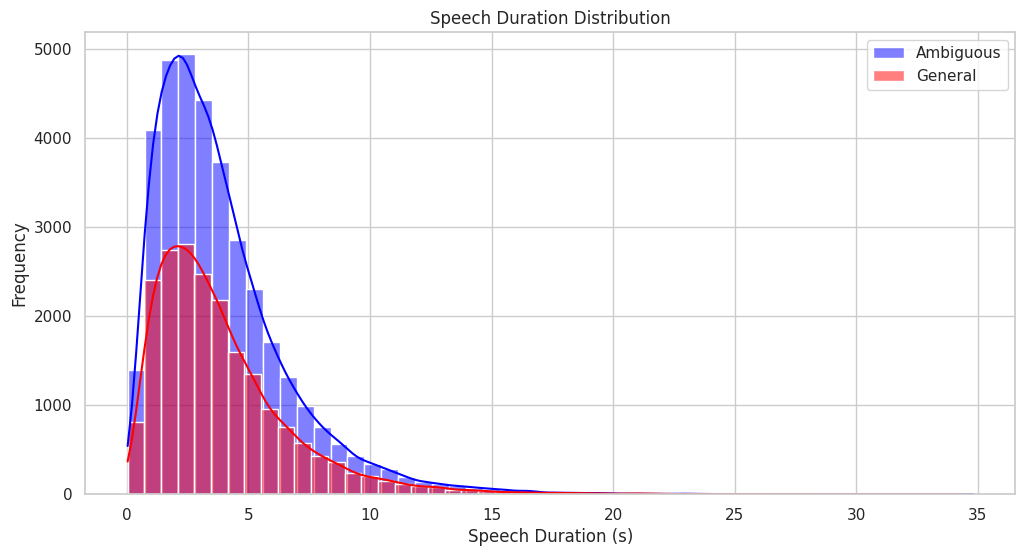

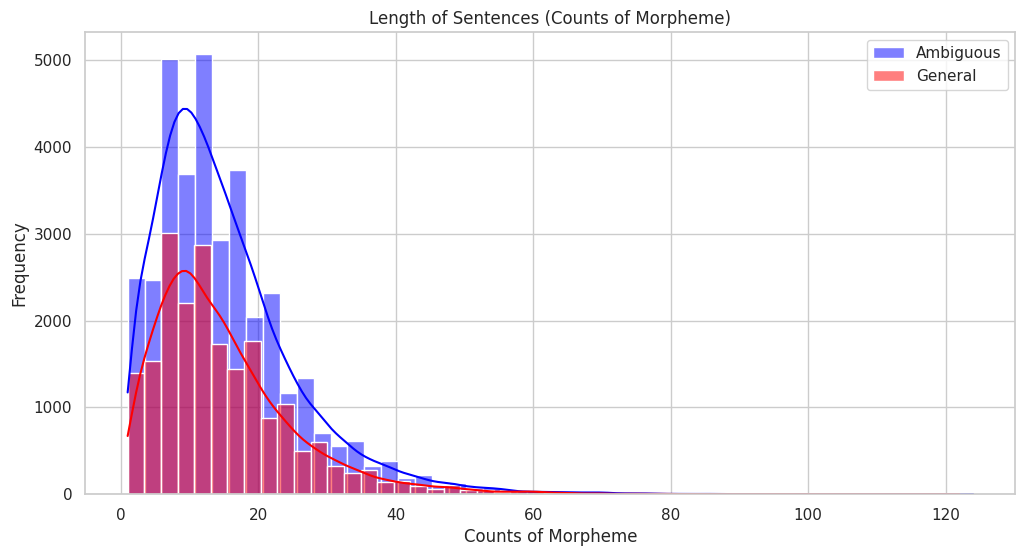

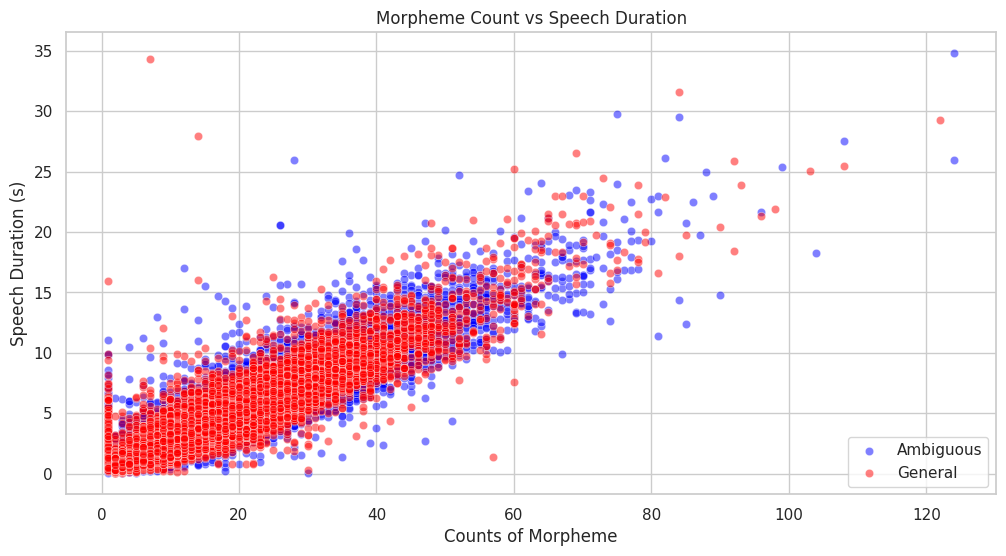

Ambiguous - 문장 길이와 발화 길이의 상관계수: 0.91
General - 문장 길이와 발화 길이의 상관계수: 0.91

### 발화 길이 (Speech Duration) 통계 비교 ###
count    35865.000000
mean         3.877447
std          2.794082
min          0.033367
25%          1.935269
50%          3.236570
75%          5.071738
max         34.801468
Name: speech_duration, dtype: float64
count    20607.000000
mean         3.875424
std          2.865949
min          0.033367
25%          1.901902
50%          3.203203
75%          5.038372
max         34.334334
Name: speech_duration, dtype: float64 

### 문장 길이 (Counts of Morpheme) 통계 비교 ###
count    35865.000000
mean        15.250383
std         10.447936
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max        124.000000
Name: morpheme_count, dtype: float64
count    20607.000000
mean        15.073228
std         10.563380
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max        122.000000
Name: morpheme_count, dtype: 

<ipython-input-51-10d675a40000>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y='Speech Duration', data=df_combined_speech, palette=['blue', 'red'])


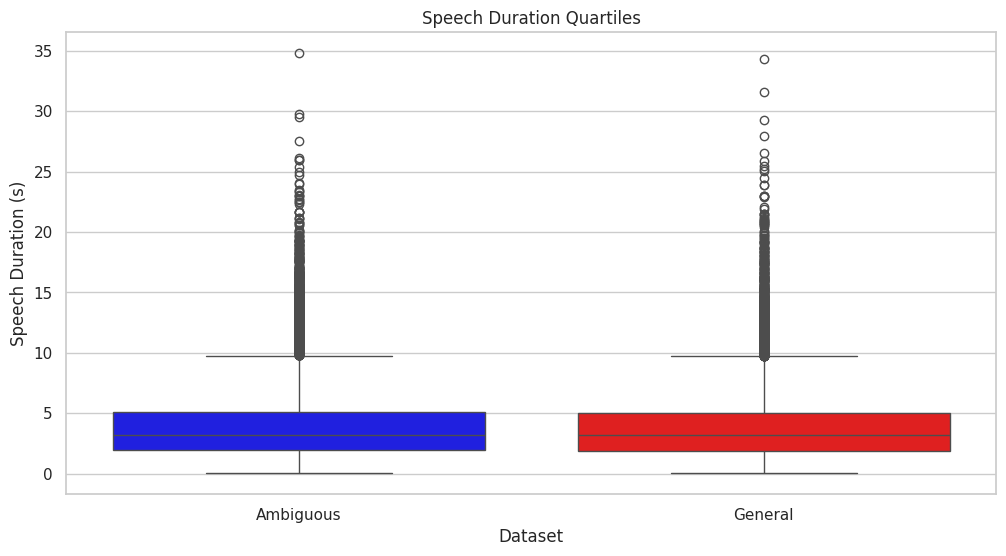

<ipython-input-51-10d675a40000>:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y='Morpheme Count', data=df_combined_morpheme, palette=['blue', 'red'])


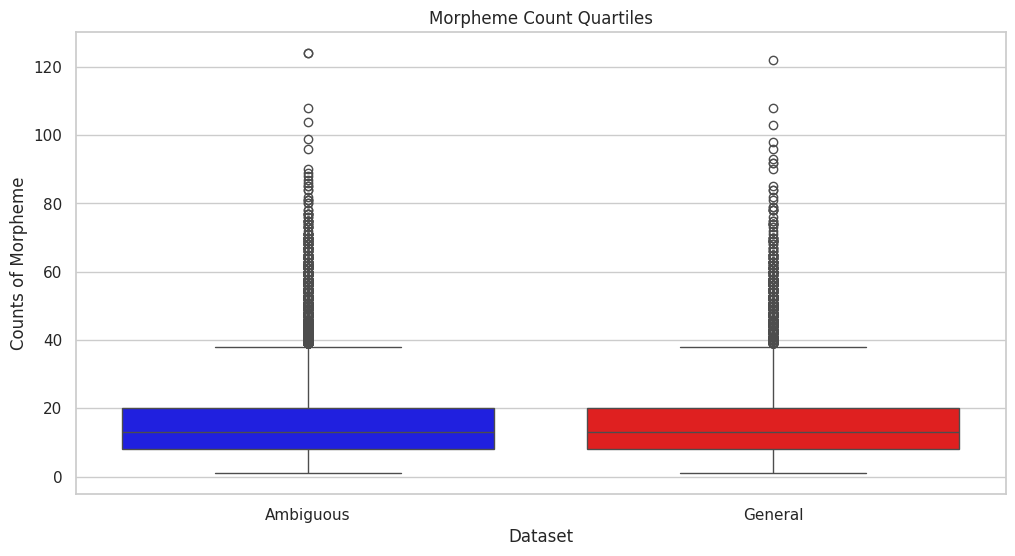

### EDA 비교 완료 ###


In [ ]:
compare_eda(ambiguous_data, general_data, frame_rate=29.97, labels=("Ambiguous", "General"))

## 파일명 및 .wav 파일 시간순 강제 정렬

In [ ]:
import os
import shutil
import pandas as pd

# 원천 데이터 및 대상 경로 설정
# source_root = "/content/drive/MyDrive/aiffel/aiffelthon/multimodal/멀티모달 영상"  # 원천 데이터 루트 폴더
# new_root_ambg = "/content/drive/MyDrive/AIFFELthon/Data/UnseenData_Multimodal/Pragmatic/Test_dataset/Pragmatic_Ambiguous(m=s!=t)/raw/target_only"  # 복사할 대상 폴더
# new_root_non = "/content/drive/MyDrive/AIFFELthon/Data/UnseenData_Pragmatic/Pragmatic/Test_dataset/Non_Ambiguous(m=s=t)/raw/target_only"  # 복사할 대상 폴더

In [ ]:
# def copy_and_rename_wav_files(general_data, source_root, new_root):
#     # unit_folder와 clip_id를 그룹화
#     grouped = general_data.groupby(['unit_folder', 'clip_id'])

#     for (unit_folder, clip_id), group in grouped:
#         # 원천 폴더와 대상 폴더 경로 설정
#         source_folder = os.path.join(source_root, unit_folder, f"clip_{clip_id}")
#         target_folder = os.path.join(new_root, unit_folder, f"clip_{clip_id}")

#         # 폴더가 존재하면 복사
#         if os.path.exists(source_folder):
#             shutil.copytree(source_folder, target_folder, dirs_exist_ok=True)

#             # 파일명 변경
#             for _, row in group.iterrows():
#                 old_file = os.path.join(target_folder, f"{row['file_index']}.wav")
#                 new_file = os.path.join(target_folder, f"{row['new_filename']}")

#                 if os.path.exists(old_file):
#                     os.rename(old_file, new_file)
#                     print(f"Renamed: {new_file}")
#                 else:
#                     print(f"File not found: {old_file}")
#         else:
#             print(f"Source folder not found: {source_folder}")


In [ ]:
# import logging

# def copy_and_rename_wav_files(general_data, source_root, new_root):
#     """
#     general_data: pandas DataFrame containing 'unit_folder', 'clip_id', 'file_index', 'new_filename' columns
#     source_root: str, root directory of source files
#     new_root: str, root directory where files will be copied and renamed
#     """

#     # 로깅 설정
#     logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

#     # unit_folder와 clip_id를 그룹화
#     grouped = general_data.groupby(['unit_folder', 'clip_id'])

#     for (unit_folder, clip_id), group in grouped:
#         # 원천 폴더와 대상 폴더 경로 설정
#         source_folder = os.path.join(source_root, unit_folder, f"clip_{clip_id}")
#         target_folder = os.path.join(new_root, unit_folder, f"clip_{clip_id}")

#         logging.info(f"Processing Unit: {unit_folder}, Clip ID: {clip_id}")
#         logging.info(f"Source Folder: {source_folder}")
#         logging.info(f"Target Folder: {target_folder}")

#         # 소스 폴더가 존재하는지 확인
#         if os.path.exists(source_folder) and os.path.isdir(source_folder):
#             # 대상 폴더가 없으면 생성
#             os.makedirs(target_folder, exist_ok=True)
#             logging.info(f"Ensured target folder exists: {target_folder}")

#             # 소스 폴더 내 모든 파일을 복사
#             for file_name in os.listdir(source_folder):
#                 source_file = os.path.join(source_folder, file_name)
#                 target_file = os.path.join(target_folder, file_name)

#                 if os.path.isfile(source_file):
#                     try:
#                         shutil.copy2(source_file, target_file)
#                         logging.info(f"Copied: {target_file}")
#                     except Exception as e:
#                         logging.error(f"Failed to copy {source_file} to {target_file}: {e}")
#                 else:
#                     logging.warning(f"Skipped non-file: {source_file}")

#             # 파일명 변경
#             for _, row in group.iterrows():
#                 old_file = os.path.join(target_folder, f"{row['file_index']}.wav")
#                 new_file = os.path.join(target_folder, f"{row['new_filename']}")

#                 if os.path.exists(old_file):
#                     try:
#                         os.rename(old_file, new_file)
#                         logging.info(f"Renamed: {new_file}")
#                     except Exception as e:
#                         logging.error(f"Failed to rename {old_file} to {new_file}: {e}")
#                 else:
#                     logging.warning(f"File not found for renaming: {old_file}")
#         else:
#             logging.error(f"Source folder not found or is not a directory: {source_folder}")


In [ ]:
# ambiguous_data['ambiguous'] = 'True'
# ambiguous_data

,file_index,unit_folder,clip_id,category,frame,person_id,script,script_start,script_end,morpheme,sound_emotion,multimodal_emotion,text_emotion,intent,strategy,new_filename,ambiguous
121,0001-0400_11_4,0001-0400,11,fashion,752,1,비싸진 않겠지?,747,781,"[['비싸', 'VA'], ['아', 'EC'], ['지', 'VX'], ['ㄴ',...",neutral,neutral,fear,question,QESD,clip11_6.wav,True
122,0001-0400_11_2,0001-0400,11,fashion,805,2,머리가 많이 안 길어서 괜찮을 거야. 내가 다니는 데 소개시켜줄까?,791,921,"[['머리', 'NNG'], ['가', 'JKS'], ['많이', 'MAG'], [...",neutral,neutral,happy,question,RSD,clip11_7.wav,True
165,0001-0400_15_5,0001-0400,15,foods,592,2,그래. 뭐 먹지. 아 배고파서 돌도 씹어먹을 수 있을 거 같아 지금.,462,626,"[['그래', 'IC'], ['.', 'SF'], ['뭐', 'NP'], ['먹',...",neutral,neutral,happy,response,QESD,clip15_3.wav,True
168,0001-0400_15_9,0001-0400,15,foods,823,1,"아, 근데 너 빈 속이라서 매운 거 먹으면 안 좋지 않아?",756,871,"[['아', 'IC'], [',', 'SP'], ['근데', 'MAJ'], ['너'...",neutral,neutral,sad,question,QESD,clip15_6.wav,True
170,0001-0400_15_6,0001-0400,15,foods,1104,1,그래. 그럼 새로 생긴 마라탕집 가자.,1056,1136,"[['그래', 'IC'], ['.', 'SF'], ['그럼', 'MAJ'], ['새...",neutral,neutral,happy,request,RSD,clip15_8.wav,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78966,5201-5600_5599_1,5201-5600,5599,relationship,2489,280,너… 왜 그래? 무섭게…,2344,2500,"[['너', 'NP'], ['…', 'SE'], ['왜', 'MAG'], ['그래'...",surprise,surprise,fear,question,QESD,clip5599_10.wav,True
78967,5201-5600_5599_14,5201-5600,5599,relationship,2505,279,승재씨.,2500,2564,"[['승재', 'NNP'], ['씨', 'NNB'], ['.', 'SF']]",surprise,surprise,neutral,greeting_call,SD,clip5599_11.wav,True
78968,5201-5600_5599_7,5201-5600,5599,relationship,2575,280,응?,2564,2589,"[['응', 'IC'], ['?', 'SF']]",surprise,surprise,neutral,question,QESD,clip5599_12.wav,True
78969,5201-5600_5599_5,5201-5600,5599,relationship,2749,279,승재씨는 나를 사랑하기는 했어?,2589,2751,"[['승재', 'NNP'], ['씨', 'NNB'], ['는', 'JX'], ['나...",dislike,dislike,fear,question,QESD,clip5599_13.wav,True


In [ ]:
# general_data['non_ambiguous'] = 'True'
# general_data

,file_index,unit_folder,clip_id,category,frame,person_id,script,script_start,script_end,morpheme,sound_emotion,multimodal_emotion,text_emotion,intent,strategy,new_filename,non_ambiguous
82,0001-0400_8_8,0001-0400,8,health,334,1,그냥 요즘 살기가 너무 힘들어. … 내가 세상에서.. 아무 쓸모도 없이 살아가고 있...,276,566,"[['그냥', 'MAG'], ['요즘', 'NNG'], ['살', 'VV'], ['...",sad,sad,sad,expression,SD,clip8_2.wav,True
84,0001-0400_8_4,0001-0400,8,health,929,1,"아니, 딱히 무슨 일이 있어서 그런 게 아니라…그냥 너무 힘이 들어.",761,941,"[['아니', 'IC'], [',', 'SP'], ['딱히', 'MAG'], ['무...",sad,sad,sad,response,SD,clip8_4.wav,True
90,0001-0400_8_9,0001-0400,8,health,1898,1,고마워. 생각 좀 해볼게.,1857,1910,"[['고맙', 'VA'], ['어', 'EF'], ['.', 'SF'], ['생각'...",neutral,neutral,neutral,response,SD,clip8_10.wav,True
111,0001-0400_10_2,0001-0400,10,health,1184,1,네 시간? 그거 자고서 어떻게 일상생활을 해? 안 졸려?,1110,1282,"[['네', 'MM'], ['시간', 'NNG'], ['?', 'SF'], ['그것...",surprise,surprise,surprise,question,QESD,clip10_8.wav,True
181,0001-0400_16_6,0001-0400,16,living,929,2,그치? 맛있으니까 줄이 이렇게 긴 거겠지.,893,991,"[['그', 'NP'], ['하', 'XSA'], ['지', 'EF'], ['?',...",happy,happy,happy,response,RSD,clip16_7.wav,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78819,5201-5600_5589_9,5201-5600,5589,relationship,54,279,민지 언니는.\t 그 뒤로 연락 없어?,31,120,"[['민지', 'NNP'], ['언니', 'NNG'], ['는', 'JX'], ['...",fear,fear,fear,question,QESD,clip5589_0.wav,True
78821,5201-5600_5589_7,5201-5600,5589,relationship,334,279,"둘이 보통 사이였어?\t 10년을 만났으면 거의 가족이지.\t 어떻게 헤어졌다고, ...",265,491,"[['둘', 'NR'], ['이', 'JKS'], ['보통', 'MAG'], ['사...",fear,fear,fear,question,QESD,clip5589_2.wav,True
78916,5201-5600_5596_6,5201-5600,5596,living,255,280,뭐? 극단? 당신 회사는 어떡하고?,186,305,"[['뭐', 'IC'], ['?', 'SF'], ['극단', 'NNP'], ['?'...",surprise,surprise,surprise,question,QESD,clip5596_1.wav,True
78975,5201-5600_5600_8,5201-5600,5600,relationship,929,279,"당신을 정말 사랑했어. 근데, 그래서 더 화가 나.",775,981,"[['당신', 'NP'], ['을', 'JKO'], ['정말', 'MAG'], ['...",angry,angry,angry,statement,SD,clip5600_4.wav,True


In [ ]:
# # 현재 clip 5330까지 완료
# import pandas as pd

# # 데이터 불러오기
# # ambiguous_data = pd.read_csv('your_data.csv')  # 실제 데이터 파일 경로로 변경
# ambiguous_data_copy = ambiguous_data.copy()
# # clip_id가 5331 이상인 행만 필터링
# ambiguous_data = ambiguous_data[ambiguous_data['clip_id'] >= 5331]

In [ ]:
# copy_and_rename_wav_files(ambiguous_data, source_root, new_root_ambg)

In [ ]:
# # 현재 clip 102까지 완료
# general_data_copy = general_data.copy()
# general_data_copy = general_data_copy[general_data_copy['clip_id'] >= 102]

In [ ]:
# # 코드 수정

# def copy_and_rename_selected_wav_files(general_data, source_root, new_root):
#     # unit_folder와 clip_id를 그룹화
#     grouped = general_data.groupby(['unit_folder', 'clip_id'])

#     for (unit_folder, clip_id), group in grouped:
#         # 원천 폴더 및 대상 폴더 경로 설정
#         source_folder = os.path.join(source_root, unit_folder, f"clip_{clip_id}")
#         target_folder = os.path.join(new_root, unit_folder, f"clip_{clip_id}")

#         # 대상 폴더 생성
#         os.makedirs(target_folder, exist_ok=True)

#         for _, row in group.iterrows():
#             old_file = os.path.join(source_folder, f"{row['file_index']}.wav")
#             new_file = os.path.join(target_folder, f"{row['new_filename']}")

#             # 파일 존재 여부 확인 후 복사 및 이름 변경
#             if os.path.exists(old_file):
#                 shutil.copy2(old_file, new_file)
#                 print(f"Copied and renamed: {new_file}")
#             else:
#                 print(f"File not found: {old_file}")



In [ ]:
# copy_and_rename_selected_wav_files(general_data_copy, source_root, new_root_non)

In [ ]:
# import re

# def remove_misplaced_files(new_root):
#     # 유닛 폴더 순회
#     for unit_folder in os.listdir(new_root):
#         unit_path = os.path.join(new_root, unit_folder)

#         if not os.path.isdir(unit_path):
#             continue  # 폴더가 아니면 스킵

#         # 클립 폴더 순회
#         for clip_folder in os.listdir(unit_path):
#             clip_path = os.path.join(unit_path, clip_folder)

#             if not os.path.isdir(clip_path):
#                 continue  # 폴더가 아니면 스킵

#             # 파일 목록 가져오기
#             for file_name in os.listdir(clip_path):
#                 file_path = os.path.join(clip_path, file_name)

#                 # 파일이 file_index 형식인지 확인 (예: 0001-0400_1_9.wav)
#                 file_index_pattern = re.compile(r'^\d{4}-\d{4}_\d+_\d+\.wav$')

#                 if file_index_pattern.match(file_name):
#                     os.remove(file_path)
#                     print(f"Deleted misplaced file: {file_path}")


# 2. Compare results with LLM labeling data

## 1) data load

In [108]:
import pandas as pd
import os
import json
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
# GPT-4o-mini labeling data
gpt_Ambiguous_json = '/content/drive/MyDrive/AIFFELthon/Data/UnseenData_ambig_multimodal/ambiguous_multimodal/Pragmatic_Ambiguous_dataset/test_1000/GPT_labeled_test_1000/GPT_label_Ambiguous_emotion.json'
gpt_NonAmbiguous_json = '/content/drive/MyDrive/AIFFELthon/Data/UnseenData_ambig_multimodal/ambiguous_multimodal/Pragmatic_Ambiguous_dataset/test_1000/GPT_labeled_test_1000/GPT_label_Non_ambiguous_emotion.json'
# human labeling data
human_Ambiguous_csv = '/content/drive/MyDrive/AIFFELthon/Data/UnseenData_ambig_multimodal/ambiguous_multimodal/Pragmatic_Ambiguous_dataset/test_1000/human_label/Ambiguous/test_ambiguous.csv'
human_NonAmbiguous_csv = '/content/drive/MyDrive/AIFFELthon/Data/UnseenData_ambig_multimodal/ambiguous_multimodal/Pragmatic_Ambiguous_dataset/test_1000/human_label/Non_Ambiguous/test_non_ambiguous.csv'

In [147]:
df_gpt_ambig = pd.read_json(gpt_Ambiguous_json)
df_gpt_non_ambig = pd.read_json(gpt_NonAmbiguous_json)

df_human_ambig = pd.read_csv(human_Ambiguous_csv)
df_human_non_ambig = pd.read_csv(human_NonAmbiguous_csv)

In [ ]:
def extract_unique_emotions(df, columns):
    unique_emotions = set()
    for col in columns:
        unique_emotions.update(df[col].dropna().unique())  # NaN 값 제거 후 고유 값 추가
    return list(unique_emotions)

In [ ]:
def translate_emotion(korean_emotion):
    """한글 감정 값을 영어로 변환하는 함수"""
    emotion_dict = {
        "분노": "angry",
        "기쁨": "happy",
        "슬픔": "sad",
        "놀람": "surprise",
        "공포": "fear",
        "경멸": "contempt",
        "혐오": "dislike",
        "중립": "neutral"
    }
    return emotion_dict.get(korean_emotion, korean_emotion)  # 사전에 없으면 원래 값 반환

def extract_emotions(result):
    if isinstance(result, dict):  # result가 딕셔너리인 경우
        schema = result.get('schema', result)  # 'schema' 키가 있으면 사용, 없으면 그대로 사용
        primary = schema.get('primary_emotion', None)
        secondary = schema.get('secondary_emotion', None)
        return translate_emotion(primary), translate_emotion(secondary)
    return None, None  # result가 예상치 못한 경우

def merge_gpt_emotion_into_human(df_gpt, df_human):
    if len(df_gpt) != len(df_human):
        return "df_gpt != df_human"
    df_merged = df_human.copy()
    df_merged[['primary_emotion', 'secondary_emotion']] = df_gpt['result'].apply(lambda x: pd.Series(extract_emotions(x)))
    return df_merged

### Ambiguous

In [102]:
emotion_list = extract_unique_emotions(df_human_ambig, ['m_s_emotion', 'text_emotion'])
print(emotion_list)

['neutral', 'sad', 'angry', 'surprise', 'happy', 'fear', 'contempt', 'dislike']


In [103]:
# 실행
merged_emotion = merge_gpt_emotion_into_human(df_gpt_ambig, df_human_ambig)
merged_emotion

,new_filename,person_id,script,m_s_emotion,text_emotion,primary_emotion,secondary_emotion
0,clip3359_1.wav,167,저기요! 거기 남자! 어이!,angry,fear,angry,surprise
1,clip3524_1.wav,178,응 준영아. 엄마는 어디 가셨니?,surprise,happy,happy,surprise
2,clip3622_9.wav,182,그 놈의 술이 문제야. 다들 그렇게 골골거리면서 왜 만나기만 하면 브레이크없이 달린...,dislike,angry,angry,dislike
3,clip4614_11.wav,232,그래. 이름이 뭐니?,happy,neutral,fear,sad
4,clip103_5.wav,6,사람이 사람 좋아하는 건데 너무 이상하게 들만 생각 하는 것 같아. 나는 그런 사람...,neutral,happy,sad,dislike
...,...,...,...,...,...,...,...
995,clip1106_5.wav,56,한국대학교는 경영학과도 수학 잘해야 갈 수 있어요?,fear,neutral,sad,happy
996,clip3029_2.wav,151,치킨?,happy,neutral,happy,surprise
997,clip4329_5.wav,218,근데 무슨 일인데? 뭐 심각한 일 있어?,angry,fear,sad,dislike
998,clip5599_3.wav,279,….이해해.,dislike,neutral,sad,happy


In [37]:
# 레이블링 보완(추가요청) 전
# emotion_list = extract_unique_emotions(merged_emotion, ['primary_emotion', 'secondary_emotion'])
# print(emotion_list)

['공포', '불안', '무관심', '당혹', '담담', '무감각', '혼란', '놀람', '실망', '걱정', '혐오', '궁금', '경멸', '기쁨', '슬픔', '분노', '안도', '안정', '짜증']


In [104]:
# 레이블링 보완 후
emotion_list = extract_unique_emotions(merged_emotion, ['primary_emotion', 'secondary_emotion'])
print(emotion_list)

['sad', 'angry', 'surprise', 'happy', 'fear', 'contempt', 'dislike']


In [38]:
# merged_emotion.to_csv('/content/merged_emotion.csv', index=False)

### Non-ambiguous

In [150]:
NonAmbig_merged_emotion = merge_gpt_emotion_into_human(df_gpt_non_ambig, df_human_non_ambig)
NonAmbig_merged_emotion

,new_filename,person_id,script,m_s_t_emotion,primary_emotion,secondary_emotion
0,clip3663_4.wav,183,엄마가 좀 그렇긴 한데. 할머니 싸우지 마요. 엄마 맨날 울어.,sad,sad,angry
1,clip2280_4.wav,114,아빠… 너무 감동적이야.,happy,happy,sad
2,clip3750_1.wav,187,언니... 나 1년 동안 편하게 자 본 적이 없는 거 같애. 애 키우는 게 이렇게 ...,sad,sad,happy
3,clip2053_19.wav,103,저... 집에 갈래요... 무서워요...,fear,fear,sad
4,clip4335_4.wav,217,이거 반응 보니까 맞네~ 맞네. 좋아하는 거 맞어~ 언제부터 좋아했어요? 오래 됐어...,happy,happy,surprise
...,...,...,...,...,...,...
995,clip4142_2.wav,208,나는 경단이 좀 됐잖아.,sad,sad,happy
996,clip1979_13.wav,99,아빠 그냥 알려고 하지 마. 나 좀 내버려 둬.,dislike,angry,sad
997,clip1370_7.wav,70,쓰지! 화장실에 항상 두고 써.,neutral,surprise,happy
998,clip3298_4.wav,166,어머 너 작년에도 같은 반이었던 하나?,surprise,surprise,happy


In [112]:
# 레이블링 보완(추가요청) 전
emotion_list = extract_unique_emotions(NonAmbig_merged_emotion, ['primary_emotion', 'secondary_emotion'])
print(emotion_list)

['걱정', '얼마나 기분이 이상하실 것 같아요.', 'neutral', 'sad', 'angry', 'surprise', 'happy', ' 분노', 'fear', '혼란', '감사', 'contempt', '짚고넘기기', 'dislike', '짜증', '당혹', '기쁘다', '우려']


In [151]:
# 보완 후
emotion_list = extract_unique_emotions(NonAmbig_merged_emotion, ['primary_emotion', 'secondary_emotion'])
print(emotion_list)

['neutral', 'sad', 'angry', 'surprise', 'happy', 'fear', 'contempt', 'dislike']


## 2) Comparison

In [152]:
ambig_merged_emotion = merged_emotion
ambig_merged_emotion

,new_filename,person_id,script,m_s_emotion,text_emotion,primary_emotion,secondary_emotion
0,clip3359_1.wav,167,저기요! 거기 남자! 어이!,angry,fear,angry,surprise
1,clip3524_1.wav,178,응 준영아. 엄마는 어디 가셨니?,surprise,happy,happy,surprise
2,clip3622_9.wav,182,그 놈의 술이 문제야. 다들 그렇게 골골거리면서 왜 만나기만 하면 브레이크없이 달린...,dislike,angry,angry,dislike
3,clip4614_11.wav,232,그래. 이름이 뭐니?,happy,neutral,fear,sad
4,clip103_5.wav,6,사람이 사람 좋아하는 건데 너무 이상하게 들만 생각 하는 것 같아. 나는 그런 사람...,neutral,happy,sad,dislike
...,...,...,...,...,...,...,...
995,clip1106_5.wav,56,한국대학교는 경영학과도 수학 잘해야 갈 수 있어요?,fear,neutral,sad,happy
996,clip3029_2.wav,151,치킨?,happy,neutral,happy,surprise
997,clip4329_5.wav,218,근데 무슨 일인데? 뭐 심각한 일 있어?,angry,fear,sad,dislike
998,clip5599_3.wav,279,….이해해.,dislike,neutral,sad,happy


In [153]:
NonAmbig_merged_emotion

,new_filename,person_id,script,m_s_t_emotion,primary_emotion,secondary_emotion
0,clip3663_4.wav,183,엄마가 좀 그렇긴 한데. 할머니 싸우지 마요. 엄마 맨날 울어.,sad,sad,angry
1,clip2280_4.wav,114,아빠… 너무 감동적이야.,happy,happy,sad
2,clip3750_1.wav,187,언니... 나 1년 동안 편하게 자 본 적이 없는 거 같애. 애 키우는 게 이렇게 ...,sad,sad,happy
3,clip2053_19.wav,103,저... 집에 갈래요... 무서워요...,fear,fear,sad
4,clip4335_4.wav,217,이거 반응 보니까 맞네~ 맞네. 좋아하는 거 맞어~ 언제부터 좋아했어요? 오래 됐어...,happy,happy,surprise
...,...,...,...,...,...,...
995,clip4142_2.wav,208,나는 경단이 좀 됐잖아.,sad,sad,happy
996,clip1979_13.wav,99,아빠 그냥 알려고 하지 마. 나 좀 내버려 둬.,dislike,angry,sad
997,clip1370_7.wav,70,쓰지! 화장실에 항상 두고 써.,neutral,surprise,happy
998,clip3298_4.wav,166,어머 너 작년에도 같은 반이었던 하나?,surprise,surprise,happy


In [154]:
# ambig_merged_emotion.to_csv('/content/Ambig_merged_emotion.csv', index=False)
# NonAmbig_merged_emotion.to_csv('/content/NonAmbig_merged_emotion.csv', index=False)

### 중의성 데이터: 일치 비율

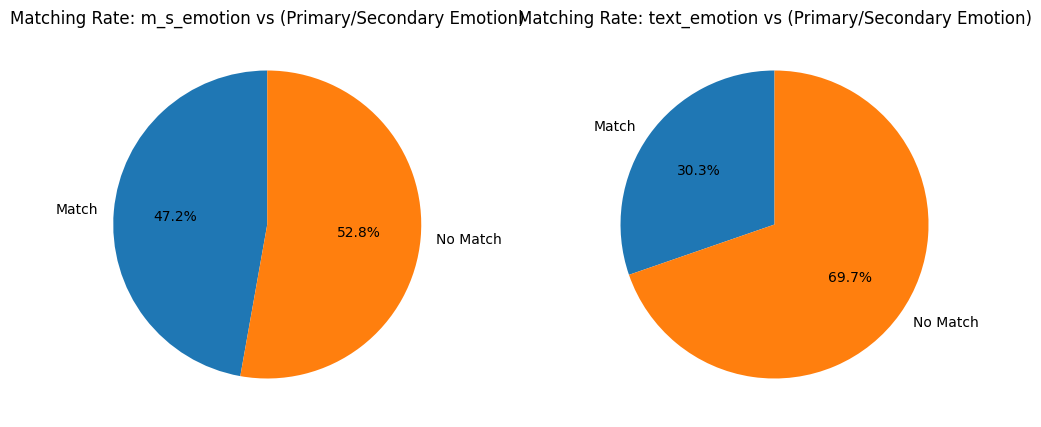

In [156]:
import matplotlib.pyplot as plt

df = ambig_merged_emotion

# 1. primary_emotion 또는 secondary_emotion 중 하나라도 m_s_emotion과 일치하는 경우
match_m_s = (df['primary_emotion'] == df['m_s_emotion']) | (df['secondary_emotion'] == df['m_s_emotion'])
match_m_s_count = match_m_s.sum()
total_count = len(df)

# 2. primary_emotion 또는 secondary_emotion 중 하나라도 text_emotion과 일치하는 경우
match_text = (df['primary_emotion'] == df['text_emotion']) | (df['secondary_emotion'] == df['text_emotion'])
match_text_count = match_text.sum()

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 첫 번째 그래프 (m_s_emotion과의 일치 비율)
axes[0].pie([match_m_s_count, total_count - match_m_s_count], labels=['Match', 'No Match'], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Matching Rate: m_s_emotion vs (Primary/Secondary Emotion)')

# 두 번째 그래프 (text_emotion과의 일치 비율)
axes[1].pie([match_text_count, total_count - match_text_count], labels=['Match', 'No Match'], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Matching Rate: text_emotion vs (Primary/Secondary Emotion)')

# 그래프 출력
plt.show()

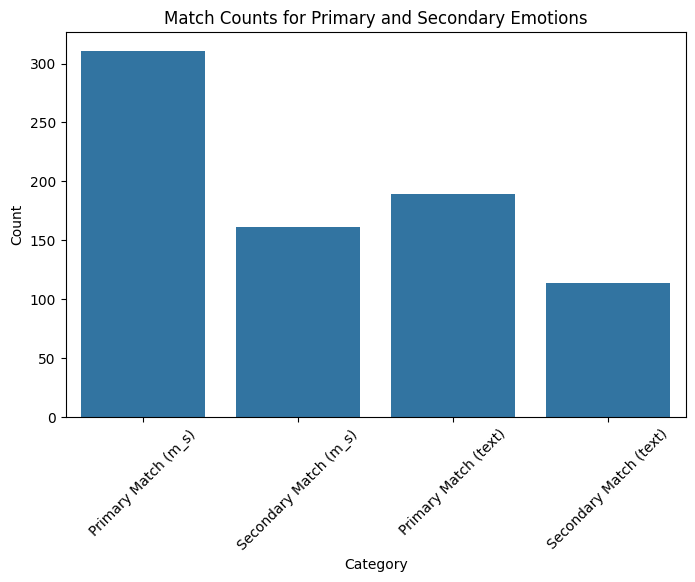

In [157]:
import seaborn as sns

# primary_emotion과 secondary_emotion이 각각 m_s_emotion과 일치하는 경우
primary_match_m_s = (df['primary_emotion'] == df['m_s_emotion']).sum()
secondary_match_m_s = (df['secondary_emotion'] == df['m_s_emotion']).sum()

# primary_emotion과 secondary_emotion이 각각 text_emotion과 일치하는 경우
primary_match_text = (df['primary_emotion'] == df['text_emotion']).sum()
secondary_match_text = (df['secondary_emotion'] == df['text_emotion']).sum()

# 데이터프레임 생성
match_df = pd.DataFrame({
    'Category': ['Primary Match (m_s)', 'Secondary Match (m_s)', 'Primary Match (text)', 'Secondary Match (text)'],
    'Count': [primary_match_m_s, secondary_match_m_s, primary_match_text, secondary_match_text]
})

# 막대 그래프 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Count', data=match_df)
plt.xticks(rotation=45)
plt.title('Match Counts for Primary and Secondary Emotions')
plt.ylabel('Count')
plt.show()

In [158]:
# 각각의 개수 출력
primary_match_m_s, secondary_match_m_s, primary_match_text, secondary_match_text

(311, 161, 189, 114)

### 중의성 데이터: 불일치 case 분석

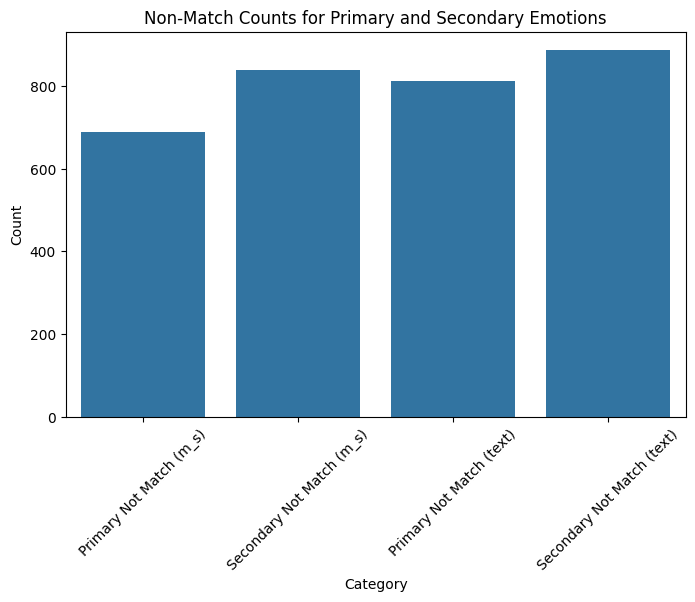

(689, 839, 811, 886)

In [159]:
# primary_emotion과 secondary_emotion이 각각 m_s_emotion과 일치하지 않는 경우
primary_not_match_m_s = len(df) - primary_match_m_s
secondary_not_match_m_s = len(df) - secondary_match_m_s

# primary_emotion과 secondary_emotion이 각각 text_emotion과 일치하지 않는 경우
primary_not_match_text = len(df) - primary_match_text
secondary_not_match_text = len(df) - secondary_match_text

# 데이터프레임 생성
not_match_df = pd.DataFrame({
    'Category': ['Primary Not Match (m_s)', 'Secondary Not Match (m_s)',
                 'Primary Not Match (text)', 'Secondary Not Match (text)'],
    'Count': [primary_not_match_m_s, secondary_not_match_m_s, primary_not_match_text, secondary_not_match_text]
})

# 막대 그래프 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Count', data=not_match_df)
plt.xticks(rotation=45)
plt.title('Non-Match Counts for Primary and Secondary Emotions')
plt.ylabel('Count')
plt.show()

# 각각의 개수 출력
primary_not_match_m_s, secondary_not_match_m_s, primary_not_match_text, secondary_not_match_text


In [160]:
# Primary 또는 Secondary 중 하나라도 m_s_emotion과 일치하는 경우의 비율
match_m_s_ratio = match_m_s_count / total_count

# 비율 출력
match_m_s_ratio

0.472

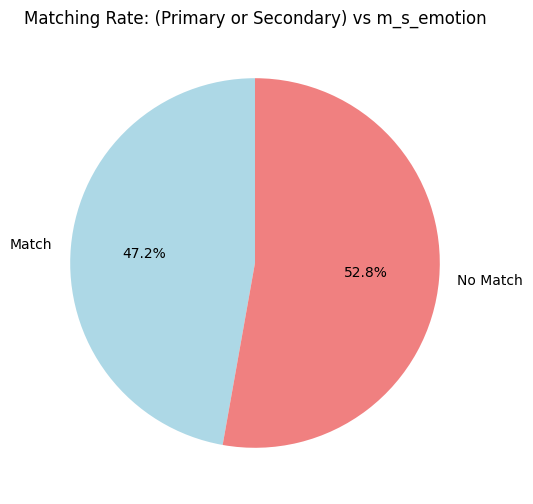

In [161]:
# 시각화: Primary 또는 Secondary 중 하나라도 m_s_emotion과 일치하는 경우의 비율

plt.figure(figsize=(6, 6))
plt.pie([match_m_s_count, total_count - match_m_s_count],
        labels=['Match', 'No Match'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Matching Rate: (Primary or Secondary) vs m_s_emotion')
plt.show()


In [163]:
# Primary 및 Secondary 모두 m_s_emotion과 불일치한 샘플 필터링
no_match_m_s_df = df[~((df['primary_emotion'] == df['m_s_emotion']) |
                        (df['secondary_emotion'] == df['m_s_emotion']))]

# 샘플 개수 확인
len(no_match_m_s_df)

528

In [164]:
no_match_m_s_df

,new_filename,person_id,script,m_s_emotion,text_emotion,primary_emotion,secondary_emotion
3,clip4614_11.wav,232,그래. 이름이 뭐니?,happy,neutral,fear,sad
4,clip103_5.wav,6,사람이 사람 좋아하는 건데 너무 이상하게 들만 생각 하는 것 같아. 나는 그런 사람...,neutral,happy,sad,dislike
5,clip4550_5.wav,228,혹시라도 그러면. 꼭 엄마아빠한테 솔직하게 얘기하고. 다시 돌아와. 그래도 돼. 그...,surprise,neutral,sad,happy
9,clip5493_2.wav,276,너희 엄마가 시간 약속 지키는 거 봤냐?,fear,contempt,sad,dislike
10,clip2065_15.wav,104,어릴 땐 많이 먹어야 키도 쑥쑥 클텐데. 너무하네.,dislike,sad,sad,angry
...,...,...,...,...,...,...,...
993,clip3038_7.wav,152,다른 택배 기사님들은 다 답 없으면 다 그냥 문 앞에 두고 가시던데요.,contempt,neutral,angry,sad
995,clip1106_5.wav,56,한국대학교는 경영학과도 수학 잘해야 갈 수 있어요?,fear,neutral,sad,happy
997,clip4329_5.wav,218,근데 무슨 일인데? 뭐 심각한 일 있어?,angry,fear,sad,dislike
998,clip5599_3.wav,279,….이해해.,dislike,neutral,sad,happy


<ipython-input-167-888f9c820ad7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=no_match_m_s_counts.index, y=no_match_m_s_counts.values, palette='coolwarm')


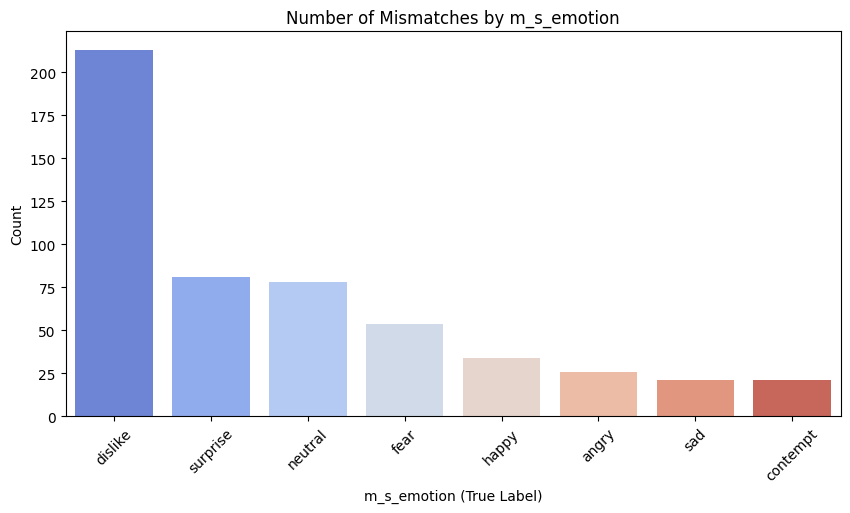

In [167]:
# 1. 감정별 불일치 개수 분석
no_match_m_s_counts = no_match_m_s_df['m_s_emotion'].value_counts()

# 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x=no_match_m_s_counts.index, y=no_match_m_s_counts.values, palette='coolwarm')
plt.xlabel('m_s_emotion (True Label)')
plt.ylabel('Count')
plt.title('Number of Mismatches by m_s_emotion')
plt.xticks(rotation=45)
plt.show()

# 감정별 불일치 개수 데이터 출력
dataframe=no_match_m_s_counts.to_frame()

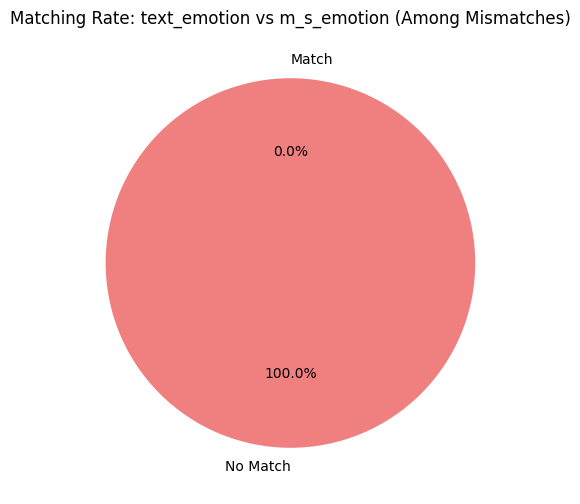

(0, 528, 0.0)

In [168]:
# 2. text_emotion과 m_s_emotion의 불일치 데이터 분석

# 불일치 데이터에서 text_emotion과 m_s_emotion 비교
text_m_s_match = (no_match_m_s_df['text_emotion'] == no_match_m_s_df['m_s_emotion']).sum()
text_m_s_not_match = len(no_match_m_s_df) - text_m_s_match

# 시각화
plt.figure(figsize=(6, 6))
plt.pie([text_m_s_match, text_m_s_not_match],
        labels=['Match', 'No Match'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Matching Rate: text_emotion vs m_s_emotion (Among Mismatches)')
plt.show()

# 일치 개수 및 비율 출력
text_m_s_match, text_m_s_not_match, text_m_s_match / len(no_match_m_s_df)

### 둘 중 하나는 text e 맞추었지만 m, s 틀린 경우

In [174]:
# "둘 중 하나는 text_emotion을 맞추었지만 m_s_emotion은 틀린" 경우 필터링
text_match_m_s_mismatch_df = df[
    ((df['primary_emotion'] == df['text_emotion']) | (df['secondary_emotion'] == df['text_emotion'])) &
    ((df['primary_emotion'] != df['m_s_emotion']) & (df['secondary_emotion'] != df['m_s_emotion']))
]

# 개수 확인
len(text_match_m_s_mismatch_df)


212

In [175]:
text_match_m_s_mismatch_df

,new_filename,person_id,script,m_s_emotion,text_emotion,primary_emotion,secondary_emotion
10,clip2065_15.wav,104,어릴 땐 많이 먹어야 키도 쑥쑥 클텐데. 너무하네.,dislike,sad,sad,angry
15,clip2440_6.wav,121,이게… 아부지도 없는 게 까불어…,fear,angry,angry,dislike
17,clip1632_6.wav,81,그래? 엄마 핸드폰 번호는 알아? 너 이 동네 살아?,neutral,fear,fear,sad
23,clip5236_2.wav,261,그래도 제가 응대를 좀 더 잘했어야 했는데.,dislike,sad,sad,angry
24,clip4378_8.wav,220,"어이구, 잘났다 잘났어. 지 엄마만 진상 만들고 있네.",dislike,angry,contempt,angry
...,...,...,...,...,...,...,...
976,clip639_4.wav,31,그러니까요. 면접보러 올 때 느꼈던 거랑은 너무 분위기가 달라서 당황스러울 정도예요...,dislike,fear,sad,fear
978,clip655_3.wav,34,난 드라마 그렇게 봤는데도 다음에 어떻게 될지 예측이 잘 안돼,dislike,sad,surprise,sad
981,clip2858_1.wav,144,네. 맞는데… 왜 그러시죠?,surprise,fear,angry,fear
983,clip786_7.wav,40,우리 집안이 대대로 위장이 좋은 편이긴 한데.,surprise,fear,sad,fear


<ipython-input-177-b4f96e9ebf06>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=m_s_emotion_mismatch_counts.index, y=m_s_emotion_mismatch_counts.values, palette='coolwarm')


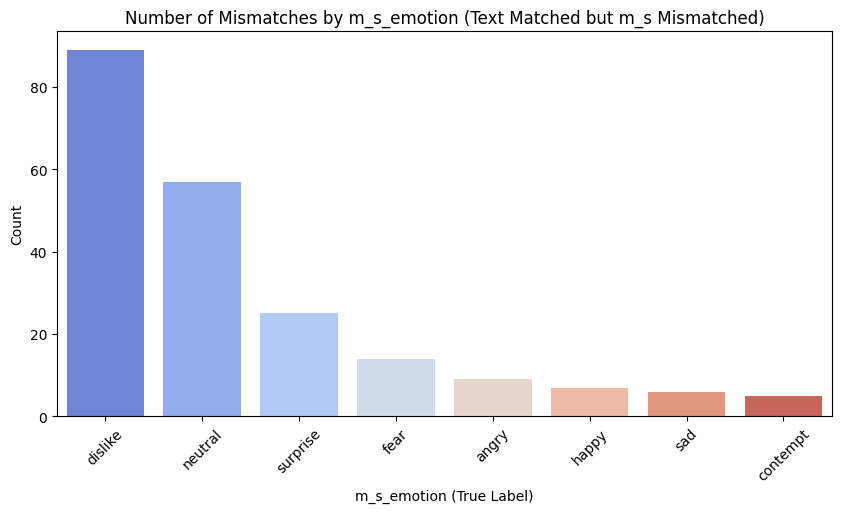

,count
m_s_emotion,
dislike,89
neutral,57
surprise,25
fear,14
angry,9
happy,7
sad,6
contempt,5


In [177]:
# 1. 이 케이스에서 m_s_emotion별 분포 분석
m_s_emotion_mismatch_counts = text_match_m_s_mismatch_df['m_s_emotion'].value_counts()

# 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x=m_s_emotion_mismatch_counts.index, y=m_s_emotion_mismatch_counts.values, palette='coolwarm')
plt.xlabel('m_s_emotion (True Label)')
plt.ylabel('Count')
plt.title('Number of Mismatches by m_s_emotion (Text Matched but m_s Mismatched)')
plt.xticks(rotation=45)
plt.show()

# 감정별 불일치 개수 데이터 출력
m_s_emotion_mismatch_counts


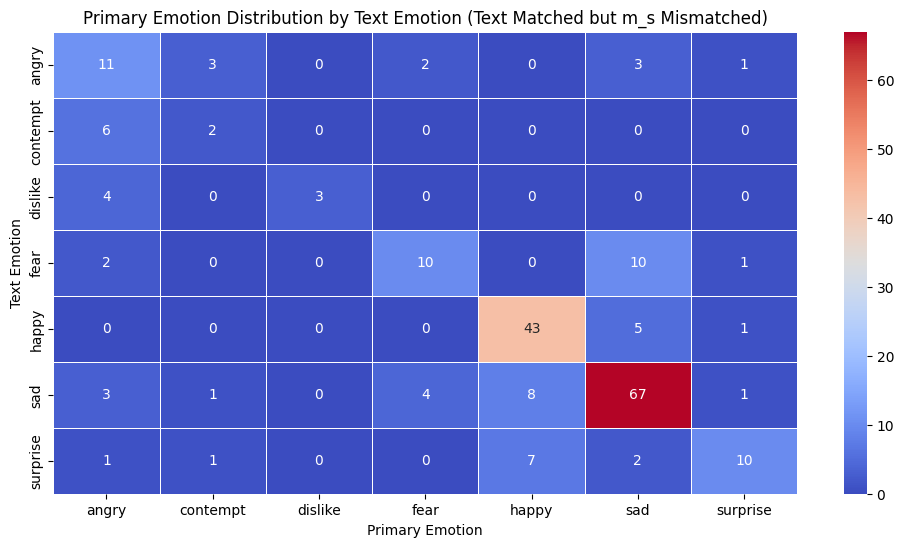

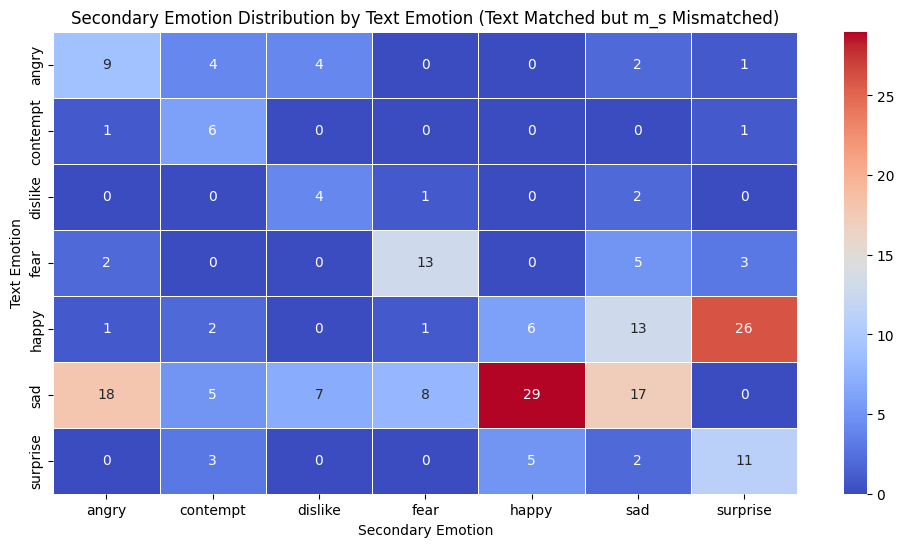

secondary_emotion,angry,contempt,dislike,fear,happy,sad,surprise
text_emotion,,,,,,,
angry,9.0,4.0,4.0,0.0,0.0,2.0,1.0
contempt,1.0,6.0,0.0,0.0,0.0,0.0,1.0
dislike,0.0,0.0,4.0,1.0,0.0,2.0,0.0
fear,2.0,0.0,0.0,13.0,0.0,5.0,3.0
happy,1.0,2.0,0.0,1.0,6.0,13.0,26.0
sad,18.0,5.0,7.0,8.0,29.0,17.0,0.0
surprise,0.0,3.0,0.0,0.0,5.0,2.0,11.0


In [178]:
# 2. text_emotion별 primary_emotion 및 secondary_emotion의 관계 분석

# text_emotion별 primary_emotion과 secondary_emotion의 빈도수 계산
text_primary_counts = text_match_m_s_mismatch_df.groupby('text_emotion')['primary_emotion'].value_counts().unstack().fillna(0)
text_secondary_counts = text_match_m_s_mismatch_df.groupby('text_emotion')['secondary_emotion'].value_counts().unstack().fillna(0)

# 시각화: primary_emotion vs text_emotion
plt.figure(figsize=(12, 6))
sns.heatmap(text_primary_counts, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5)
plt.xlabel('Primary Emotion')
plt.ylabel('Text Emotion')
plt.title('Primary Emotion Distribution by Text Emotion (Text Matched but m_s Mismatched)')
plt.show()

# 시각화: secondary_emotion vs text_emotion
plt.figure(figsize=(12, 6))
sns.heatmap(text_secondary_counts, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5)
plt.xlabel('Secondary Emotion')
plt.ylabel('Text Emotion')
plt.title('Secondary Emotion Distribution by Text Emotion (Text Matched but m_s Mismatched)')
plt.show()

# 데이터 출력
text_primary_counts
text_secondary_counts

### primary==sad, secondary==happy 인 샘플

In [180]:
# primary_emotion이 "sad"이고 secondary_emotion이 "happy"인 샘플 필터링
sad_happy_samples = df[(df['primary_emotion'] == 'sad') & (df['secondary_emotion'] == 'happy')]
sad_happy_samples

,new_filename,person_id,script,m_s_emotion,text_emotion,primary_emotion,secondary_emotion
5,clip4550_5.wav,228,혹시라도 그러면. 꼭 엄마아빠한테 솔직하게 얘기하고. 다시 돌아와. 그래도 돼. 그...,surprise,neutral,sad,happy
22,clip2665_12.wav,133,근데 가격이 제 생각보다 좀 비싸서요.,sad,fear,sad,happy
30,clip1850_10.wav,93,그것도 다 옛날 말이지. 나도 어떻게 해야 될지 모르겠어. 걔네랑 놀지 말라고 하면...,dislike,fear,sad,happy
58,clip4496_3.wav,226,로봇 아이스크림? 아... 로봇 주는 아이스크림?,happy,fear,sad,happy
67,clip5162_3.wav,260,아니야. 내가 할게. 나 마음이 불편해.,dislike,sad,sad,happy
...,...,...,...,...,...,...,...
971,clip3803_6.wav,191,제가 멍청했으면 좋겠어요. 그럼 엄마가 공부 안 시킬 거 아니에요.,dislike,sad,sad,happy
972,clip532_5.wav,27,소정이가 어디로 이사가는데? 멀리 이사 가?,surprise,fear,sad,happy
973,clip4688_11.wav,236,"촬영장에선, 화장실 가고 싶으니까, 그만큼은 못 마시지.",dislike,neutral,sad,happy
995,clip1106_5.wav,56,한국대학교는 경영학과도 수학 잘해야 갈 수 있어요?,fear,neutral,sad,happy


<ipython-input-181-aaa2cfbb3748>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=text_emotion_counts.index, y=text_emotion_counts.values, palette='coolwarm')


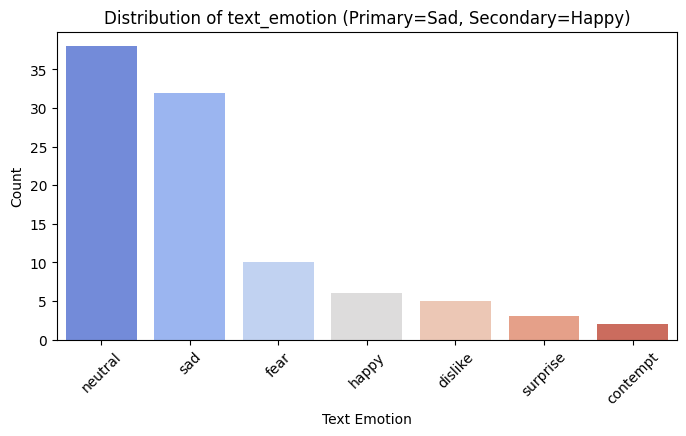

<ipython-input-181-aaa2cfbb3748>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=m_s_emotion_counts.index, y=m_s_emotion_counts.values, palette='coolwarm')


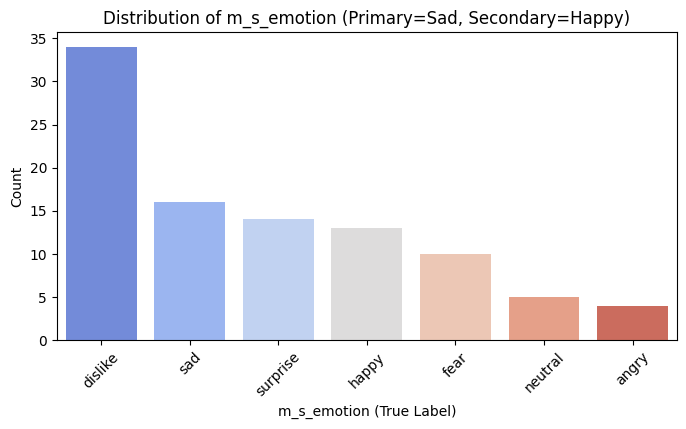

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. text_emotion 분포
text_emotion_counts = sad_happy_samples['text_emotion'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=text_emotion_counts.index, y=text_emotion_counts.values, palette='coolwarm')
plt.xlabel('Text Emotion')
plt.ylabel('Count')
plt.title('Distribution of text_emotion (Primary=Sad, Secondary=Happy)')
plt.xticks(rotation=45)
plt.show()

# 2. m_s_emotion 분포
m_s_emotion_counts = sad_happy_samples['m_s_emotion'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=m_s_emotion_counts.index, y=m_s_emotion_counts.values, palette='coolwarm')
plt.xlabel('m_s_emotion (True Label)')
plt.ylabel('Count')
plt.title('Distribution of m_s_emotion (Primary=Sad, Secondary=Happy)')
plt.xticks(rotation=45)
plt.show()


## [기록] GPT 레이블링 오류 case 재요청

In [ ]:
!pip install openai
!pip show openai

In [48]:
import openai
from openai import OpenAI
import os
import json
import ast
import time

In [144]:
os.environ["OPENAI_API_KEY"] = "..."

In [113]:
API_KEY = os.getenv("OPENAI_API_KEY")
# invalid_emotion_rows  = pd.read_csv('/content/Invalid_Emotion_Data.csv')
# invalid_emotion_rows  = pd.read_csv('/content/non_ambig_Invalid_Emotion_Data.csv')
invalid_emotion_rows

,Unnamed: 0,sentence_id,sentence,context,result,primary_emotion,secondary_emotion
0,51,52,너 또 공부 얘기 하려고 그러지…,"응. 나는 글씨도 잘 써. 어휴, 넌 니 자신이 그렇게 좋아? 응. 나는 내가 잘 ...","{'primary_emotion': ' 분노', 'secondary_emotion'...",분노,혐오
1,58,59,아니.. 그런걸 어떻게 말하냐.,헐 뭐야 뭐 같이 먹으면 살찐다고 먹지 말라고 하고. 거의 엄마네. 어. 아니 그냥...,"{'name': 'emotion_analysis', 'strict': True, '...",혼란,슬픔
2,208,209,근데 우리가 이렇게 계속 같이 다닐 수 없으니까…,"나는 아는 사람 없는데… 어떡하지? 오늘도 윤성이 그 형한테 끌려 갈까봐, 우리가 ...","{'primary_emotion': '슬픔', 'secondary_emotion':...",슬픔,기쁘다
3,283,284,감사합니다~ 다 선배 덕분이에요.,지영씨 진짜 축하해! 감사합니다~ 다 선배 덕분이에요. 내 덕분이긴~ 내가 한게 뭐...,"{'name': 'emotion_analysis', 'strict': True, '...",기쁨,감사
4,292,293,지가 안참으면 어쩔거야. 아 짜증나.,뭐? 너 오늘 죽어볼래? 꼬우면 치세요. 치라면 못 칠 거 같아? 치세요. 여기 경...,"{'primary_emotion': '분노', 'secondary_emotion':...",분노,짜증
5,433,434,응.,그래도 이제 수능까지 1년도 안 남았는데. 성적이 자꾸 떨어지기만 하니까. 엄마는 ...,"{'name': 'emotion_analysis', 'strict': True, '...",슬픔,걱정
6,450,451,아니라까요. 그냥 영환데 잠깐 야한 장면이 나온거에요.,아들. 엄마 다 이해해. 네? 뭘요? 아들이 아직 성인이 아니라 엄연히 안되는 거긴...,"{'name': 'emotion_analysis', 'strict': True, '...",당혹,혐오
7,503,504,정말요?,"뭐가요? 내가 학생한테 그 얘기 한 이후로, 우리 집에서는 흐느끼는 소리가 안 들...","{'primary_emotion': '놀람', 'secondary_emotion':...",놀람,혼란
8,620,621,고양이… 내가 잘 키울 수 있을까? 한 번도 키운다는 걸 진지하게 고려해본 적이 없...,우리 엄마가 원래 밥 주던 고양이가 있는데 걔가 눈이랑 다리를 다쳐서 우리가 입원을...,"{'name': 'emotion_analysis', 'strict': True, '...",걱정,기쁨
9,708,709,네. 여기요.,그러면 영어 하자. 네. 여기요. 선생님이 먼저 한 번 볼게. ... 네. 뭐야...,"{'name': 'emotion_analysis', 'strict': True, '...",놀람,혼란


In [115]:
invalid_emotion_rows = invalid_emotion_rows.drop(index=[0, 2])
invalid_emotion_rows

,Unnamed: 0,sentence_id,sentence,context,result,primary_emotion,secondary_emotion
1,58,59,아니.. 그런걸 어떻게 말하냐.,헐 뭐야 뭐 같이 먹으면 살찐다고 먹지 말라고 하고. 거의 엄마네. 어. 아니 그냥...,"{'name': 'emotion_analysis', 'strict': True, '...",혼란,슬픔
3,283,284,감사합니다~ 다 선배 덕분이에요.,지영씨 진짜 축하해! 감사합니다~ 다 선배 덕분이에요. 내 덕분이긴~ 내가 한게 뭐...,"{'name': 'emotion_analysis', 'strict': True, '...",기쁨,감사
4,292,293,지가 안참으면 어쩔거야. 아 짜증나.,뭐? 너 오늘 죽어볼래? 꼬우면 치세요. 치라면 못 칠 거 같아? 치세요. 여기 경...,"{'primary_emotion': '분노', 'secondary_emotion':...",분노,짜증
5,433,434,응.,그래도 이제 수능까지 1년도 안 남았는데. 성적이 자꾸 떨어지기만 하니까. 엄마는 ...,"{'name': 'emotion_analysis', 'strict': True, '...",슬픔,걱정
6,450,451,아니라까요. 그냥 영환데 잠깐 야한 장면이 나온거에요.,아들. 엄마 다 이해해. 네? 뭘요? 아들이 아직 성인이 아니라 엄연히 안되는 거긴...,"{'name': 'emotion_analysis', 'strict': True, '...",당혹,혐오
7,503,504,정말요?,"뭐가요? 내가 학생한테 그 얘기 한 이후로, 우리 집에서는 흐느끼는 소리가 안 들...","{'primary_emotion': '놀람', 'secondary_emotion':...",놀람,혼란
8,620,621,고양이… 내가 잘 키울 수 있을까? 한 번도 키운다는 걸 진지하게 고려해본 적이 없...,우리 엄마가 원래 밥 주던 고양이가 있는데 걔가 눈이랑 다리를 다쳐서 우리가 입원을...,"{'name': 'emotion_analysis', 'strict': True, '...",걱정,기쁨
9,708,709,네. 여기요.,그러면 영어 하자. 네. 여기요. 선생님이 먼저 한 번 볼게. ... 네. 뭐야...,"{'name': 'emotion_analysis', 'strict': True, '...",놀람,혼란
10,722,723,근데 좀 걱정스럽다. 요즘애들은 더치페이니 뭐니 해서 결혼도 반반 하는 줄 알았는데...,정현이 딸래미? 지은인가? 지은이가 몇 살이지? 벌써 결혼 하네. 지은이 벌써 서른...,"{'name': 'emotion_analysis', 'strict': True, '...",슬픔,걱정
11,741,742,가방이 엄청 무거워 보이는구나. 안 무겁니?,엄마는 언제 오신다니? 엄마 10분이면 오신대요. 저 잠깐 여기 있어도 되죠? 그럼...,"{'name': 'emotion_analysis', 'strict': True, '...",우려,기쁨


In [ ]:
# df = pd.read_csv('/content/best_batch_PragAmbig.csv')
# df = pd.read_csv('/content/best_batch_NonPragAmbig.csv')
# df

In [125]:
# def clean_list_column_keep_format(text):
#     """
#     리스트 형태의 문자열을 변환하고, 리스트 내 각 원소에서
#     탭 문자(\t) 및 비정상 공백(\xa0)만 제거 (리스트 형식 유지)
#     """
#     if isinstance(text, str):
#         try:
#             # 문자열이 리스트 형태라면 변환 (예: "['문장1', '문장2']" → ['문장1', '문장2'])
#             text_list = ast.literal_eval(text)
#             if not isinstance(text_list, list):
#                 return text  # 원본 문자열 그대로 반환
#         except (ValueError, SyntaxError):
#             return text  # 원본 문자열 그대로 반환
#     elif isinstance(text, list):
#         text_list = text
#     else:
#         return text  # 원본 그대로 반환

#     # 리스트의 각 원소에서 탭(\t) 및 비정상 공백(\xa0) 제거 (리스트 형식 유지)
#     cleaned_list = [s.replace("\t", " ").replace("\xa0", " ") if isinstance(s, str) else s for s in text_list]

#     return str(cleaned_list)  # 리스트 형식을 유지하면서 문자열로 변환

# # 'pre_post_5_sentences' 컬럼 정제 적용
# df["pre_post_5_sentences"] = df["pre_post_5_sentences"].apply(clean_list_column_keep_format)

In [127]:
# import re
# def clean_text_v19(text):
#     """
#     'script' 컬럼의 특수문자 정리,
#     '?'가 단어 사이에 있을 경우만 띄어쓰기로 변환,
#     문장 끝이나 강조를 위한 '?'는 유지,
#     '!', '~', ',' 및 '.'(1~3개 이하)을 원본 그대로 유지,
#     '\t' (탭 문자)는 공백으로 변환.
#     """
#     if not isinstance(text, str):
#         return ""

#     # 단어 사이에 있는 '?'가 잘못 들어간 경우 공백으로 변환 (예: "훈아~?누나" → "훈아~ 누나")
#     text = re.sub(r"\?(?=[가-힣a-zA-Z0-9])", " ", text)

#     # '\t' (탭 문자)를 공백으로 변환
#     text = text.replace("\t", " ")

#     # \xa0 (비정상 공백) 제거
#     text = text.replace("\xa0", " ")

#     # 불필요한 공백 제거
#     text = re.sub(r"\s+", " ", text).strip()

#     return text

# # 정제된 'script' 컬럼 적용
# df["script"] = df["script"].apply(clean_text_v19)

In [128]:
# df

,file_index,new_filename,person_id,script,m_s_t_emotion,pre_post_5_sentences,clip_group
0,3601-4000_3663_9,clip3663_4.wav,183,엄마가 좀 그렇긴 한데. 할머니 싸우지 마요. 엄마 맨날 울어.,sad,"['할머니, 왜 자꾸 엄마랑 싸워요?', ' 어른들끼리 할 얘기가 많아서 그래.',...",clip3663
1,2001-2400_2280_11,clip2280_4.wav,114,아빠… 너무 감동적이야.,happy,"[' 뭐야… 뭐 이런 걸 줘… 나 이제 이 집 사람도 아닌데, 아빠 써.', '무슨...",clip2280
2,3601-4000_3750_4,clip3750_1.wav,187,언니... 나 1년 동안 편하게 자 본 적이 없는 거 같애. 애 키우는 게 이렇게 ...,sad,"['요즘 잠은 잘 자니? 얼굴이 왜 이렇게 안 좋아.', '언니... 나 1년 동안...",clip3750
3,2001-2400_2053_12,clip2053_19.wav,103,저... 집에 갈래요... 무서워요...,fear,"['걔 나랑 같은 반이었어. 걔가 다닌 학원이 여기구나. 아, 재수없어.', '그 ...",clip2053
4,4001-4400_4335_3,clip4335_4.wav,217,이거 반응 보니까 맞네~ 맞네. 좋아하는 거 맞어~ 언제부터 좋아했어요? 오래 됐어...,happy,['프로필 보니까 엄청 예쁘던데.. 쌤 솔직히 그 여사친한테 마음 있죠...,clip4335
...,...,...,...,...,...,...,...
995,4001-4400_4142_14,clip4142_2.wav,208,나는 경단이 좀 됐잖아.,sad,"['못 해서 안 하는 거면 가르쳐서라도 하겠는데, 그것도 아니에요. 자...",clip4142
996,1601-2000_1979_3,clip1979_13.wav,99,아빠 그냥 알려고 하지 마. 나 좀 내버려 둬.,dislike,"['그게 싫어? 사춘기는 누구나 겪는 건데. 너 하는 짓이 진짜 딱 사춘기같아.',...",clip1979
997,1201-1600_1370_7,clip1370_7.wav,70,쓰지! 화장실에 항상 두고 써.,neutral,"['예전부터 묻고 싶었는데... 바디 샴푸 쓰시냐구요.', '뭐... 집에 어디 있...",clip1370
998,3201-3600_3298_10,clip3298_4.wav,166,어머 너 작년에도 같은 반이었던 하나?,surprise,"['오늘 학교는 어땠어?', '오늘 엄마. 완전 대박이었어.', '왜?', '오늘 ...",clip3298


In [66]:
# invalid_indices = invalid_emotion_rows.iloc[:, 0].tolist()
# invalid_indices

[32, 94, 127, 240, 328, 345, 458, 570, 694, 728, 734, 765, 769, 788, 807, 855]

In [72]:
# invalid_indices = [345, 458, 694, 728, 734, 765, 769, 788, 855]

In [83]:
# invalid_indices = [694, 769, 788, 855]
# invalid_indices = [694,855]

In [133]:
# non ambiguous data
# invalid_indices = [58, 283, 292, 433, 450, 503, 620, 708, 722, 741, 759, 789]
# invalid_indices = [722]

In [134]:
# filtered_df = df.loc[invalid_indices].copy()
# filtered_df

,file_index,new_filename,person_id,script,m_s_t_emotion,pre_post_5_sentences,clip_group
722,4001-4400_4204_3,clip4204_6.wav,211,근데 좀 걱정스럽다. 요즘애들은 더치페이니 뭐니 해서 결혼도 반반 하는 줄 알았는데...,fear,"['정현이 딸래미? 지은인가? 지은이가 몇 살이지? 벌써 결혼 하네.', '지은이 ...",clip4204


In [68]:
## 생략

Processing sentence 33/16
Processing sentence 95/16
Processing sentence 128/16
Processing sentence 241/16
Processing sentence 329/16
Processing sentence 346/16
Processing sentence 459/16
Processing sentence 571/16
Processing sentence 695/16
Processing sentence 729/16
Processing sentence 735/16
Processing sentence 766/16
Processing sentence 770/16
Processing sentence 789/16
Processing sentence 808/16
Processing sentence 856/16


In [74]:
#### 생략

Processing sentence 346/9
Processing sentence 459/9
Processing sentence 695/9
Processing sentence 729/9
Processing sentence 735/9
Processing sentence 766/9
Processing sentence 770/9
JSON Decode Error: Extra data: line 9 column 1 (char 129)
Processing sentence 789/9
Processing sentence 856/9


In [142]:
# df = filtered_df

# # GPT API 호출 함수
# def create_chat_completion(sentence, context, system_input, model="gpt-4o-mini", temperature=1.15, max_tokens=150):
#     try:
#         user_input = f"""
#         문장: "{sentence}"
#         문맥: "{context}"
#         위 문장을 분석하고 아래 JSON 스키마에 맞춰 결과를 출력해줘:
#         ```json
#         {{
#           "name": "emotion_analysis",
#           "strict": true,
#           "schema": {{
#             "type": "object",
#             "required": [
#               "primary_emotion",
#               "secondary_emotion"
#             ],
#             "properties": {{
#               "primary_emotion": {{
#                 "enum": [
#                   "기쁨",
#                   "슬픔",
#                   "분노",
#                   "놀람",
#                   "공포",
#                   "경멸",
#                   "혐오"
#                 ],
#                 "type": "string",
#                 "description": "감정 분류 체계에 따라 선택된 가장 가능성 높은 감정."
#               }},
#               "secondary_emotion": {{
#                 "enum": [
#                   "기쁨",
#                   "슬픔",
#                   "분노",
#                   "놀람",
#                   "공포",
#                   "경멸",
#                   "혐오"
#                 ],
#                 "type": "string",
#                 "description": "감정 분류 체계에 따라 선택된 두번째로 가능성 높은 감정."
#               }}
#             }},
#             "additionalProperties": false
#           }}
#         }}
#         ```
#         """

#         # 메시지 목록 생성
#         messages = [
#             {"role": "system", "content": system_input},
#             {"role": "user", "content": user_input}
#         ]

#         # GPT API 호출
#         response = OpenAI().chat.completions.create(
#             model=model,
#             messages=messages,
#             temperature=temperature,
#             max_tokens=max_tokens
#         )

#         # 응답 처리
#         content = response.choices[0].message.content
#         clean_content = content.strip("```json").strip("```").strip()
#         return json.loads(clean_content)  # JSON 변환 후 반환

#     except json.JSONDecodeError as e:
#         print(f"JSON Decode Error: {e}")
#         return {"error": "Invalid JSON format"}
#     except Exception as e:
#         print(f"Error: {str(e)}")
#         return {"error": str(e)}

# # 시스템 프롬프트
# system_input = """
# Task: 너는 문장을 보고 문맥에 따라 감정 정보를 태깅하는 annotator야. 감정 레이블은 '기쁨,슬픔,분노,놀람,공포,경멸,혐오'로 이루어져 있어. 이 중에서 가장 타당한 1순위, 2순위 감정을 레이블링 해줘. '걱정' 등 내가 제시한 레이블링 체계에 없는 레이블은 달면 안돼.
# Calibration: 모호한 문장은 최대한 맥락을 반영하여 레이블링 해줘.
# """

# # 결과 저장 리스트
# results = []
# # 데이터프레임(df)에서 문장별 감정 분석 수행
# for i, row in df.iterrows():
#     print(f"Processing sentence {i + 1}/{len(df)}")

#     try:
#         # 문맥 정보 추가
#         sentences = ast.literal_eval(row["pre_post_5_sentences"])
#         script = row["script"]
#         position = sentences.index(script) if script in sentences else -1

#         previous_sentences = " ".join(sentences[:position])
#         next_sentences = " ".join(sentences[position+1:]) if position != -1 else ""
#         context = f"{previous_sentences} {script} {next_sentences}".strip()

#         # 감정 레이블링 수행
#         result = create_chat_completion(script, context, system_input)

#         results.append({
#             "sentence_id": i + 1,
#             "sentence": script,
#             "context": context,
#             "result": result  # 감정 레이블링 결과
#         })

#     except json.JSONDecodeError as e:
#         print(f"JSON Decode Error: {e} for sentence: {script}")
#         results.append({
#             "sentence_id": i + 1,
#             "sentence": script,
#             "context": context,
#             "result": {"error": f"JSON Decode Error: {e}"}
#         })
#     except Exception as e:
#         print(f"Error: {e} for sentence: {script}")
#         results.append({
#             "sentence_id": i + 1,
#             "sentence": script,
#             "context": context,
#             "result": {"error": str(e)}
#         })

#     # **Rate Limit 초과 방지를 위한 대기 시간 추가**
#     time.sleep(1)  # 1초 대기 후 다음 요청

#     # **50문장마다 중간 저장 (데이터 손실 방지)**
#     if (i + 1) % 50 == 0:
#         temp_output_file = f"/content/temp_emotion_analysis_{i + 1}.json"
#         with open(temp_output_file, "w", encoding="utf-8") as f:
#             json.dump(results, f, ensure_ascii=False, indent=4)
#         print(f"Temporary results saved to {temp_output_file}")

Processing sentence 723/1


In [143]:
# temp_output_file = "/content/3rd_Non-ambiguous_additional_temp_emotion_analysis.json"
# with open(temp_output_file, "w", encoding="utf-8") as f:
#     json.dump(results, f, ensure_ascii=False, indent=4)
# print(f"Temporary results saved to {temp_output_file}")

Temporary results saved to /content/3rd_Non-ambiguous_additional_temp_emotion_analysis.json
